In [1]:
!pip3 install scipy
import warnings
warnings.filterwarnings("ignore")

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import scipy.io
mat = scipy.io.loadmat('../train_32x32.mat')

In [3]:
import cv2

def convert_dataset_to_grayscale(dataset):
    gray_dataset = []
    for image in dataset:
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        gray_dataset.append(gray_image)
    return np.array(gray_dataset)

In [4]:
import numpy as np

X = mat['X']
y = mat['y']

X_raw = np.transpose(X, (3, 0, 1, 2))
X = X_raw.reshape(X_raw.shape[0], -1)
# X_gray = convert_dataset_to_grayscale(X)/255
# X = X_gray.reshape(X_gray.shape[0], -1)  # Reshape to (65911, 1024)

y = y-1
X.shape,y.shape


((73257, 3072), (73257, 1))

In [23]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=1)


X_train, X_val, y_train, y_val = train_test_split( 
    X_train, y_train, test_size=0.22, random_state=1) # 0.2*100/90

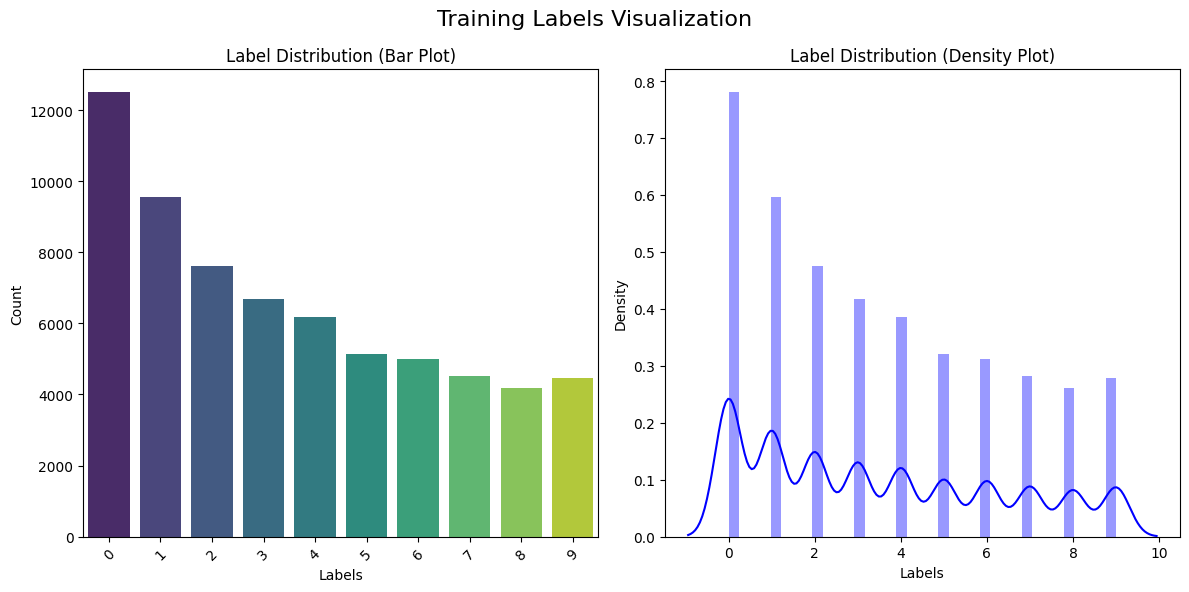

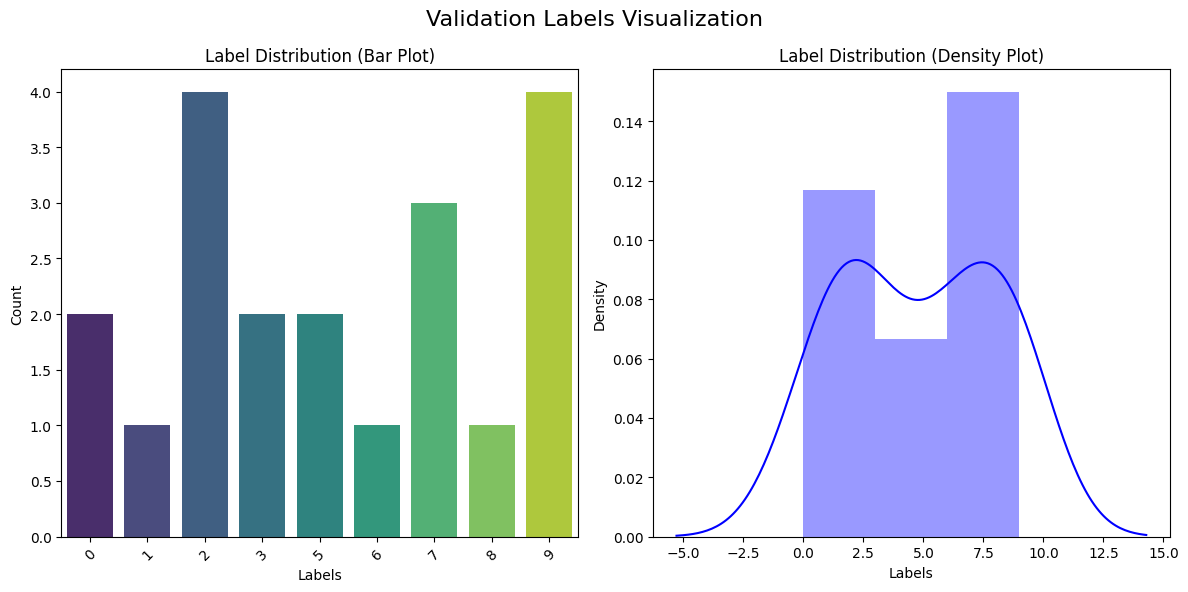

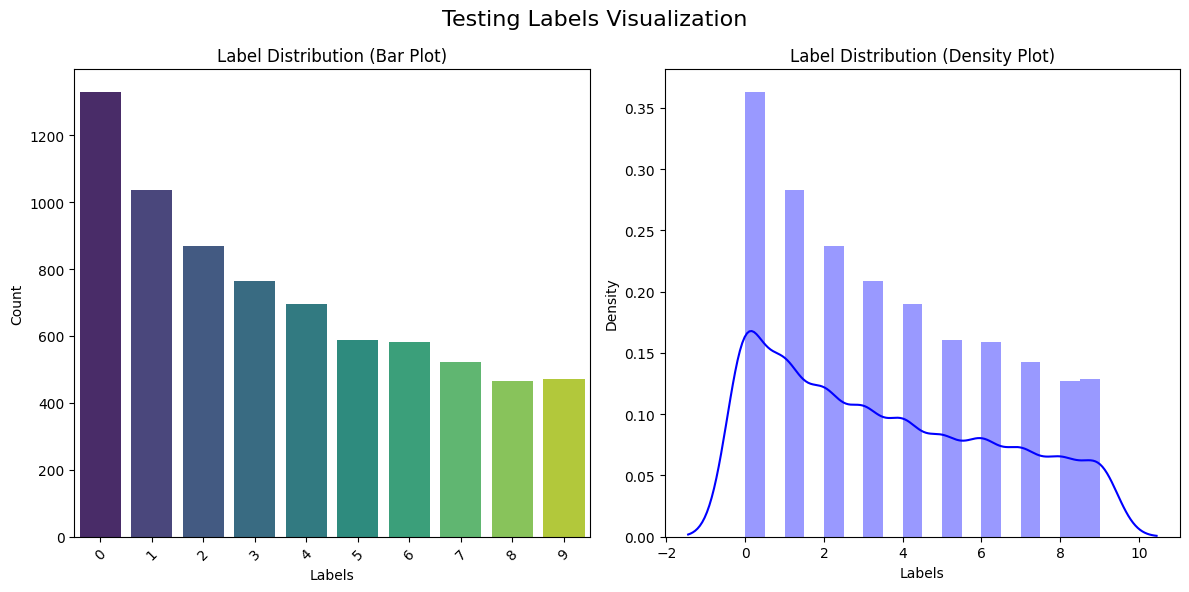

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def plot_distribution(y,title):
    
    # Create a figure with subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Create the bar plot on the first subplot
    sns.countplot(x=y, palette='viridis', ax=axes[0])
    axes[0].set_xlabel('Labels')
    axes[0].set_ylabel('Count')
    axes[0].set_title('Label Distribution (Bar Plot)')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Create the distribution plot on the second subplot
    sns.distplot(y, kde=True, color='blue', ax=axes[1])
    axes[1].set_xlabel('Labels')
    axes[1].set_ylabel('Density')
    axes[1].set_title('Label Distribution (Density Plot)')
    
    # Add a title for the entire figure
    plt.suptitle(title+' Visualization', fontsize=16)
    
    plt.tight_layout()
    plt.show()

for i in [(y_train,'Training Labels'),(y_val,'Validation Labels'),(y_test,'Testing Labels')]:
    plot_distribution(i[0].flatten(),i[1])

In [49]:
X_raw[0].shape

(32, 32, 3)

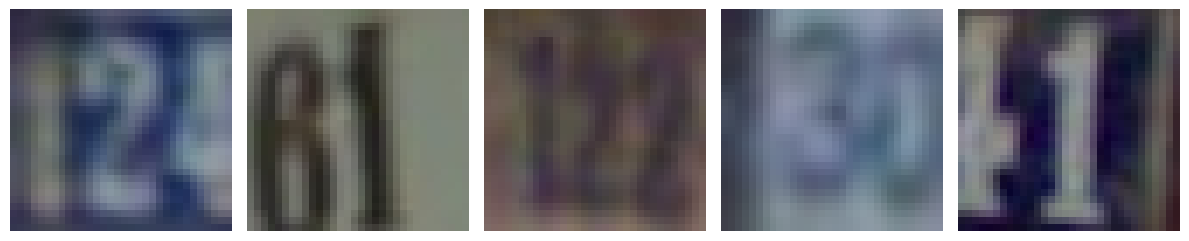

In [7]:
random_numbers = np.random.uniform(0, X_train.shape[0], 5)

fig, axes = plt.subplots(1, len(random_numbers), figsize=(12, 6))

for i, index in enumerate(random_numbers):
    ax = axes[i]
    ax.imshow(X_raw[int(index)])
    # print(y_train[int(index)])
    ax.axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()


### Preparing Dataset to train in Batches

Iteration 1, loss = 1.52500426
Iteration 2, loss = 1.01037932
Iteration 3, loss = 0.86532718
Iteration 4, loss = 0.78629943
Iteration 5, loss = 0.71455528
Iteration 6, loss = 0.66797631
Iteration 7, loss = 0.62827154
Iteration 8, loss = 0.60880439
Iteration 9, loss = 0.58423279
Iteration 10, loss = 0.56392316
Iteration 11, loss = 0.53389241
Iteration 12, loss = 0.52316102
Iteration 13, loss = 0.50462115
Iteration 14, loss = 0.48596021
Iteration 15, loss = 0.47669580
Iteration 16, loss = 0.46516808
Iteration 17, loss = 0.45613949
Iteration 18, loss = 0.44160356
Iteration 19, loss = 0.43708155
Iteration 20, loss = 0.42131980
Iteration 21, loss = 0.40847518
Iteration 22, loss = 0.40300409
Iteration 23, loss = 0.40139863
Iteration 24, loss = 0.38819621
Iteration 25, loss = 0.38676378
Iteration 26, loss = 0.39948454
Iteration 27, loss = 0.36726126
Iteration 28, loss = 0.35926109
Iteration 29, loss = 0.35978047
Iteration 30, loss = 0.34703463
Accuracy: 0.8093093093093093


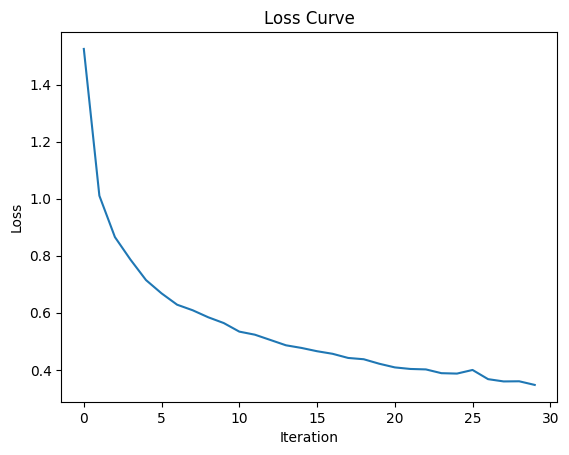

In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

model = MLPClassifier(hidden_layer_sizes=(128,64),activation='relu',max_iter=30,random_state=42,verbose=True)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Plot the loss curve
plt.plot(model.loss_curve_)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

In [51]:
y_test[100][0]

0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Class 1 Misclassified Examples:


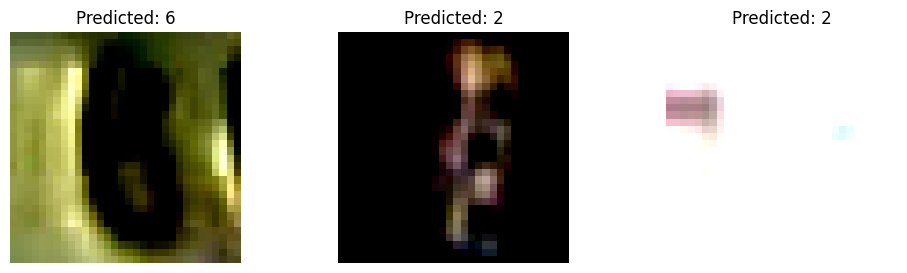

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Class 2 Misclassified Examples:


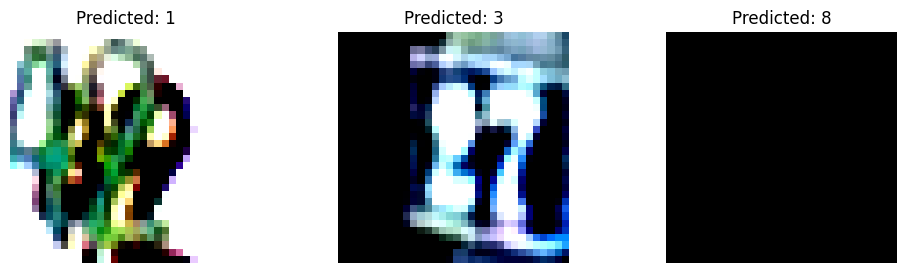

Class 3 Misclassified Examples:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


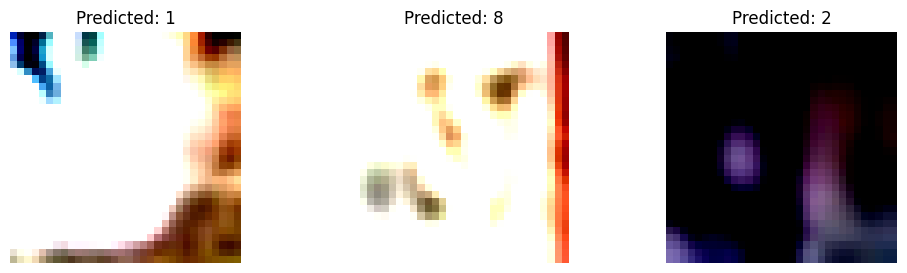

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Class 4 Misclassified Examples:


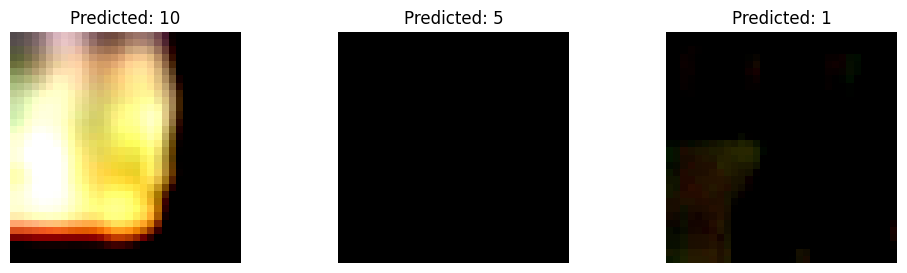

Class 5 Misclassified Examples:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


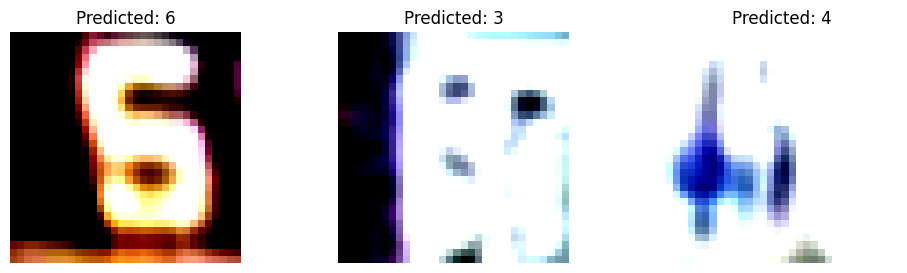

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Class 6 Misclassified Examples:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


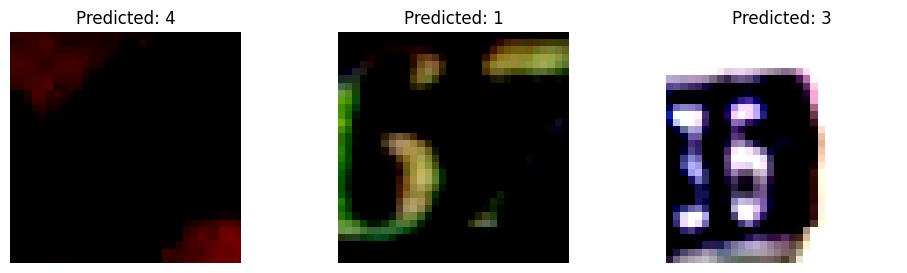

Class 7 Misclassified Examples:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


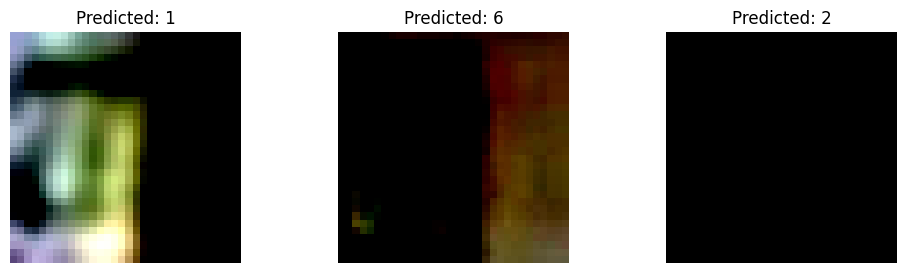

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Class 8 Misclassified Examples:


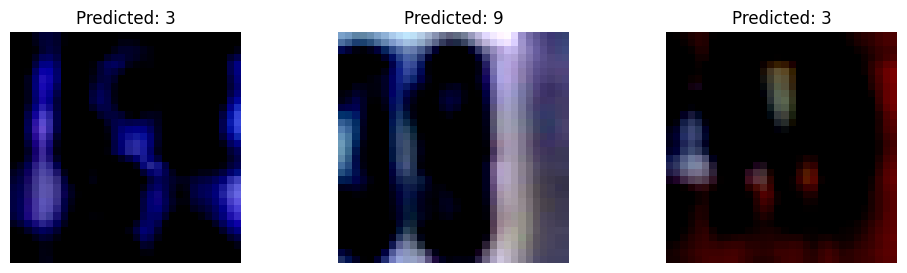

Class 9 Misclassified Examples:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


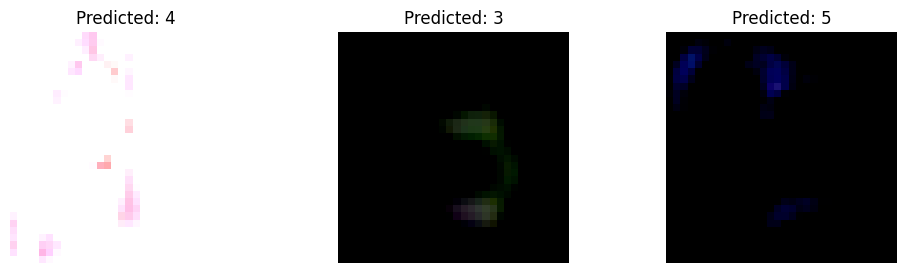

Class 10 Misclassified Examples:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


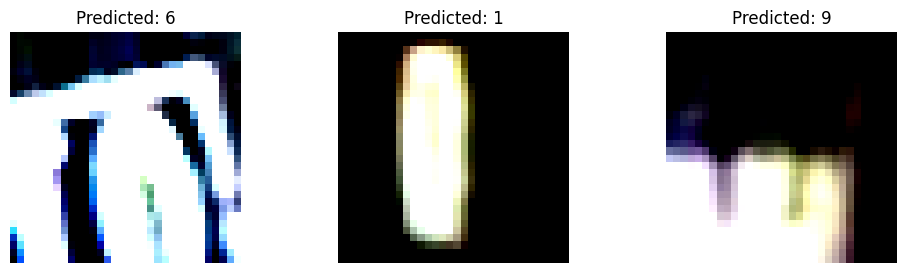

In [52]:
map = {1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[]} 

for i,X in enumerate(X_test):
    
    prediction = model.predict([X])

    if prediction[0]+1!=(y_test[i][0]+1):
        if len(map[(y_test[i][0]+1)]) < 3:
            map[(y_test[i][0]+1)].append((prediction[0]+1,X.reshape(32,32,3)))


# Visualizing misclassified samples

for true_label, misclassified_samples in map.items():
    print(f"Class {true_label} Misclassified Examples:")
    fig, axes = plt.subplots(1, len(misclassified_samples), figsize=(12, 3))
    for i, (predicted_label,reshaped_image) in enumerate(misclassified_samples):
        # reshaped_image = flattened_image.reshape(32,32)
        axes[i].imshow(reshaped_image)
        axes[i].set_title(f"Predicted: {predicted_label}")
        axes[i].axis('off')

    plt.show()


In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

X_train_grid = X_train[0:1000]
y_train_grid = y_train[0:1000]

# # Step 3: Define the neural network model
model = MLPClassifier(random_state=42)

# # Step 4: Set up a parameter grid for Grid Search
param_grid = {
    'hidden_layer_sizes': [(64, 32), (128, 64)],  # 2 hidden layers
    'activation': ['relu', 'tanh','logistic','identity'],
    'alpha' : [0.01,0.1],
    'batch_size': [32, 64],
    'max_iter': [10, 20, 30],
}

# # Step 5: Use Grid Search to find the optimal hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy',verbose=True)
grid_search.fit(X_train_grid, y_train_grid)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

# Print the results
print("Best Hyperparameters:", best_params)
print("Best Score (Accuracy):", best_score)


Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best Hyperparameters: {'activation': 'relu', 'alpha': 0.01, 'batch_size': 32, 'hidden_layer_sizes': (64, 32), 'max_iter': 30}
Best Score (Accuracy): 0.39597981214747685


In [25]:
X_val.shape

(14505, 3072)

--------------------Activation function : relu------------------------------
Iteration 1, loss = 1.51401024
Validation score: 0.623955
Iteration 2, loss = 1.05259970
Validation score: 0.689675
Iteration 3, loss = 0.93696487
Validation score: 0.722147
Iteration 4, loss = 0.85670520
Validation score: 0.743535
Iteration 5, loss = 0.80271958
Validation score: 0.750340
Iteration 6, loss = 0.75932190
Validation score: 0.754812
Iteration 7, loss = 0.73069707
Validation score: 0.783978
Iteration 8, loss = 0.70015849
Validation score: 0.767256
Iteration 9, loss = 0.67592614
Validation score: 0.776201
Iteration 10, loss = 0.65650144
Validation score: 0.783200
Iteration 11, loss = 0.64098220
Validation score: 0.775423
Iteration 12, loss = 0.62478700
Validation score: 0.784562
Iteration 13, loss = 0.61473988
Validation score: 0.772117
Iteration 14, loss = 0.59611489
Validation score: 0.793700
Iteration 15, loss = 0.59191149
Validation score: 0.778339
Iteration 16, loss = 0.58069324
Validation scor

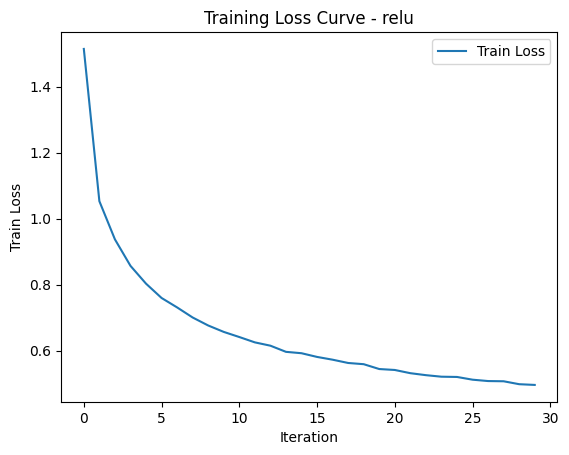

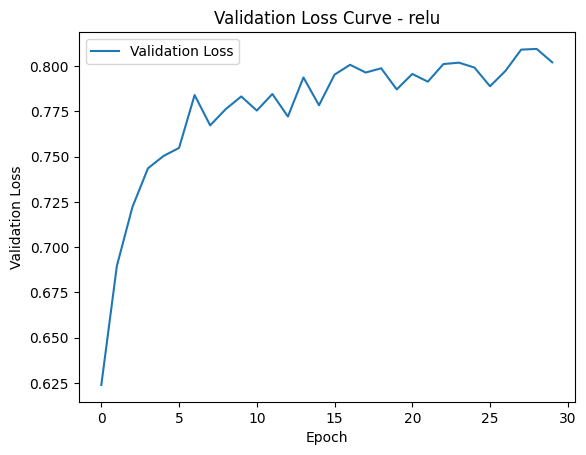

Test Accuracy: 0.7922467922467923
--------------------Activation function : logistic------------------------------
Iteration 1, loss = 2.17267977
Validation score: 0.344740
Iteration 2, loss = 1.76853179
Validation score: 0.457515
Iteration 3, loss = 1.48685031
Validation score: 0.529263
Iteration 4, loss = 1.34048617
Validation score: 0.596150
Iteration 5, loss = 1.23044243
Validation score: 0.617344
Iteration 6, loss = 1.14834558
Validation score: 0.659343
Iteration 7, loss = 1.10093020
Validation score: 0.651176
Iteration 8, loss = 1.05719351
Validation score: 0.666343
Iteration 9, loss = 1.02664132
Validation score: 0.672565
Iteration 10, loss = 0.99747968
Validation score: 0.677815
Iteration 11, loss = 0.97513160
Validation score: 0.687731
Iteration 12, loss = 0.96259008
Validation score: 0.679176
Iteration 13, loss = 0.94600937
Validation score: 0.681509
Iteration 14, loss = 0.92369330
Validation score: 0.693564
Iteration 15, loss = 0.91154917
Validation score: 0.696286
Iteration

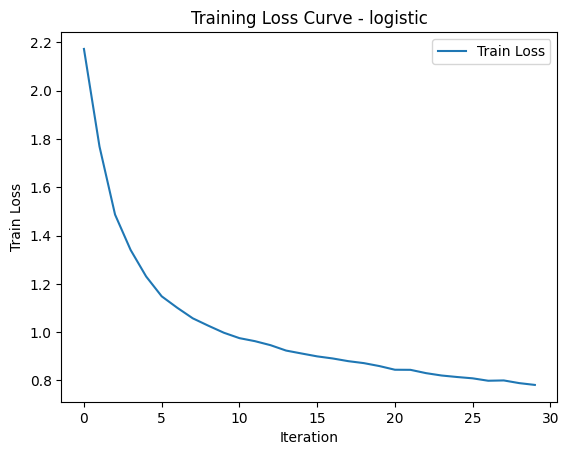

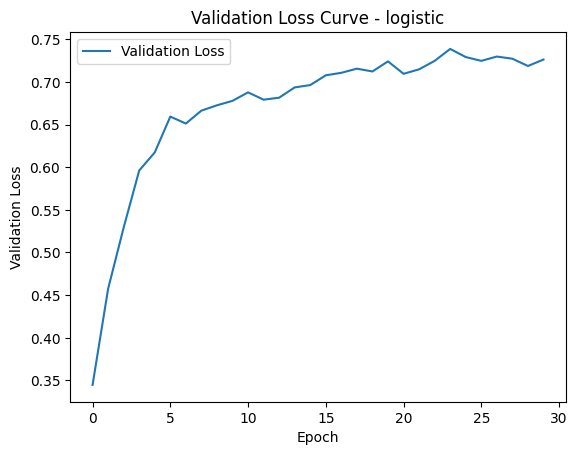

Test Accuracy: 0.7315042315042315
--------------------Activation function : tanh------------------------------
Iteration 1, loss = 2.23530580
Validation score: 0.238188
Iteration 2, loss = 2.00166113
Validation score: 0.377212
Iteration 3, loss = 1.66066917
Validation score: 0.514486
Iteration 4, loss = 1.42810638
Validation score: 0.552012
Iteration 5, loss = 1.31972115
Validation score: 0.594595
Iteration 6, loss = 1.24658508
Validation score: 0.622010
Iteration 7, loss = 1.19676593
Validation score: 0.626288
Iteration 8, loss = 1.15337334
Validation score: 0.646899
Iteration 9, loss = 1.11451272
Validation score: 0.639899
Iteration 10, loss = 1.09084321
Validation score: 0.652732
Iteration 11, loss = 1.07385051
Validation score: 0.654871
Iteration 12, loss = 1.05383663
Validation score: 0.658954
Iteration 13, loss = 1.03437318
Validation score: 0.671204
Iteration 14, loss = 1.02656463
Validation score: 0.663815
Iteration 15, loss = 1.01142515
Validation score: 0.673342
Iteration 16,

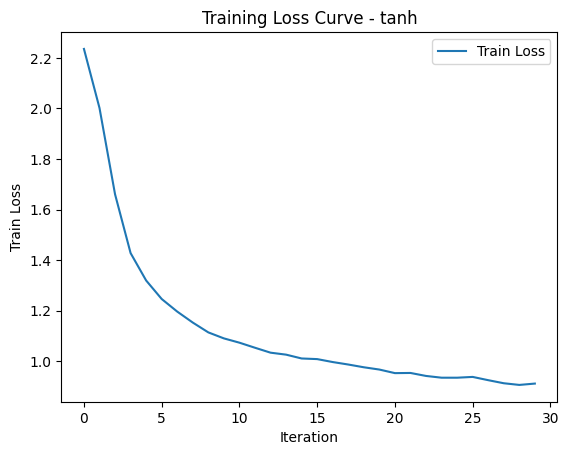

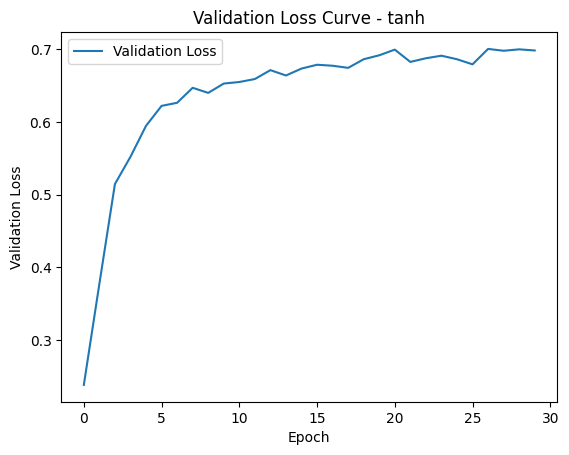

Test Accuracy: 0.69000819000819
--------------------Activation function : identity------------------------------
Iteration 1, loss = 2.37042966
Validation score: 0.221661
Iteration 2, loss = 2.20955294
Validation score: 0.222438
Iteration 3, loss = 2.20634846
Validation score: 0.230216
Iteration 4, loss = 2.20673555
Validation score: 0.226327
Iteration 5, loss = 2.19978585
Validation score: 0.236049
Iteration 6, loss = 2.19464641
Validation score: 0.245965
Iteration 7, loss = 2.19039274
Validation score: 0.249271
Iteration 8, loss = 2.17847699
Validation score: 0.250826
Iteration 9, loss = 2.17666100
Validation score: 0.252771
Iteration 10, loss = 2.16771935
Validation score: 0.246160
Iteration 11, loss = 2.16752548
Validation score: 0.258604
Iteration 12, loss = 2.16122515
Validation score: 0.262493
Iteration 13, loss = 2.15645646
Validation score: 0.262298
Iteration 14, loss = 2.15282714
Validation score: 0.258798
Iteration 15, loss = 2.15217093
Validation score: 0.247521
Iteration 1

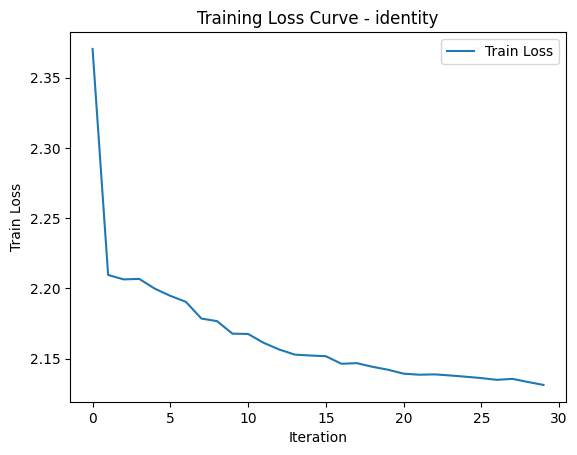

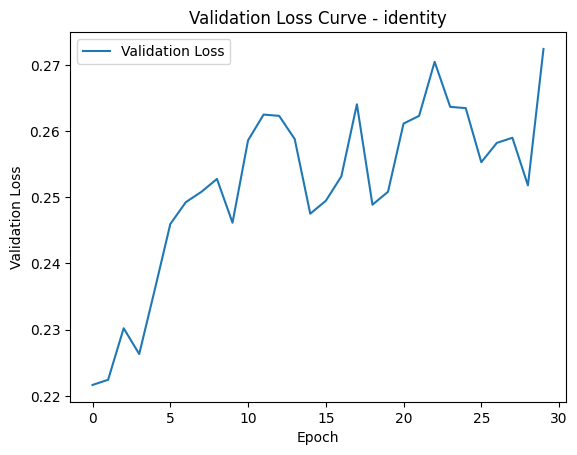

Test Accuracy: 0.26822276822276825


In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

for activation in ['relu', 'logistic', 'tanh', 'identity']:
    print(f"--------------------Activation function : {activation}------------------------------")
    
    model = MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation=activation,
        max_iter=30,
        random_state=42,
        batch_size=32,
        verbose=True,
        validation_fraction=0.22,
        early_stopping=True
    )

    model.fit(X_train, y_train)

    # Plot the training loss curve
    plt.plot(model.loss_curve_, label='Train Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Train Loss')
    plt.title(f'Training Loss Curve - {activation}')
    plt.legend()
    plt.show()

    # Plot the validation loss curve
    plt.plot(model.validation_scores_, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Loss')
    plt.title(f'Validation Loss Curve - {activation}')
    plt.legend()
    plt.show()

    # Evaluate on the test set
    y_test_pred = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    print(f'Test Accuracy: {accuracy_test}')


### Analysing the model's ability to learn effictively:

From above observation we can see that linear activation function wasn't able to learn the data properly and is giving the lowest accuracy about 25%.
This is because the data that we are learning isn't linear or linearly separable in nature. It has complex pattern that can't be learn't with linear activation function.
A large MLP with linear activation function just sums up to become a linear regression algorithm. The data that we are learning is complex/ non-linear in nature thus linear regression can't capture this complex pattern thus we have to settle for non linear activation function like ReLU, sigmoid etc. (Non linear -> The output cannot be reproduced from a linear combination of the inputs). Following example can be taken for linear and non-linear problem.


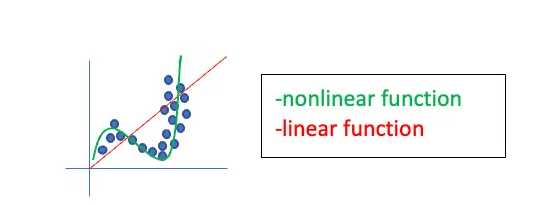


### Explaining how the set of hyperparameters was reached:

1. Hidden layer : (64,32)
2. Learning rate: 0.01
3. Batch size : 32
4. Activation : ReLU
Not commenting about iteration because of computation complexity.

Initially I used sklearn's default function MLPClassifier to get a decent accuracy on the testing set. After that I took subset of training data for grid searching to find the optimal hyperparamters according to the subset. I tested these hyperparameters and got satisfiable results with respect to the accuracy gained with default function.

The best accuracy I got was 80%.


### Reasons for model misclassification

1. Some images weren't clear and some were blurry. It's hard even for human to classify some images.
2. The distribution of data wasn't uniform.
3. Flattening the image makes it hard for algorithm to learn spatial features. ( CNN is used for this purpose.)
4. Few images had multiple digits in it making it hard for the algorithm to learn.
5. Few images were wrongly labeled.

## Not for grading purposes


In [74]:
import torch
from torch import nn
from torch.utils.data import Dataset

class CustomDataset(Dataset):

    def __init__(self,X,y):
        self.data = X
        self.labels = y

    def __len__(self):
        return len(self.labels)

    def __getitem__(self,idx):
        data_sample = self.data[idx]  # Get a single data sample
        label = self.labels[idx]
        return data_sample, label


training_dataset = CustomDataset(X_train,y_train)
val_dataset = CustomDataset(X_val,y_val)
test_dataset = CustomDataset(X_test,y_test)

In [75]:
from torch.utils.data import DataLoader

batch_size = 128
train_dataloader = DataLoader(training_dataset,batch_size=batch_size,shuffle=True)
val_dataloader = DataLoader(val_dataset,batch_size=batch_size,shuffle=True)
test_dataloader = DataLoader(test_dataset,batch_size=batch_size)

In [76]:
# Testing cell

next(iter(train_dataloader))[0].shape

torch.Size([128, 1024])

### Creating model class + Helper functions


In [77]:
#creating model class

class Model(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape,activation_fn):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_shape, hidden_units),
            activation_fn,
            nn.Linear(hidden_units,256),
            activation_fn,
            nn.Linear(256, output_shape),
            activation_fn
        )
    
    def forward(self, X):
        return self.layers(X)


In [78]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [79]:
import matplotlib.pyplot as plt

def plot_loss_graph(loss, epochs,loss_type):
    x_axis = range(epochs)
    plt.figure(figsize=(8, 6))
    print(x_axis)
    plt.plot(x_axis, loss, label=loss_type, color='b', marker='o', linestyle='-')
    plt.title(loss_type)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# plot_loss_graph(train_loss_list, num_epochs)


In [80]:
## defining function abstraction for training and testing functionalities
from tqdm.auto import tqdm

def training_step(model,dataloader,X,y,train_loss_list,loss_fn,optimizer):

    torch.manual_seed(42)
    train_loss = 0
    
    for batch,(X,y) in enumerate(dataloader):
        
        y_pred = model(X)
        
        y  = torch.squeeze(y)
#         y = y.long()
        loss = loss_fn(y_pred, y)  
        train_loss += loss
        train_acc = accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()

        if batch%520 == 0:
            print(f"Looked at {batch*len(X)}/{len(dataloader)} samples.")

    train_loss /=len(train_dataloader)

    print(f"Training loss : {train_loss} | Train acc: {train_acc:.4f}| ")
    train_loss_list.append(train_loss.item())

def testing_step(model,dataloader,X,y,test_loss_list,accuracy_list,loss_fn):
    torch.manual_seed(42)
    test_loss = 0
    test_acc = 0
    model.eval()
    
    with torch.inference_mode():
        for X, y in dataloader:
            test_pred = model(X)
            y = torch.squeeze(y)
            test_loss+=loss_fn(test_pred,y)
            test_acc += accuracy_fn(y_true=y,y_pred = test_pred.argmax(dim=1))

        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
    print(f"Test loss : {test_loss:.4f} | Test acc : {test_acc:.4f}")
    test_loss_list.append(test_loss.item())
    accuracy_list.append(test_acc)


### 1. ReLU

In [83]:
torch.manual_seed(42)

model = Model(1024,512,10,nn.ReLU()).double()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model.parameters(),
                            lr=0.01)

In [84]:
torch.manual_seed(42)

EPOCHS = 20

train_loss = 0

train_loss_list = []
test_loss_list_train = []
accuracy_list_train = []

val_loss_list = []
test_loss_list_val = []
accuracy_list_val = []

# training and testing loop
for epoch in tqdm(range(EPOCHS)):
    training_step(model,train_dataloader,X_train,y_train,train_loss_list,loss_fn,optimizer)
    testing_step(model,test_dataloader,X_test,y_test,test_loss_list_train,accuracy_list_train,loss_fn)

#training and validation loop
EPOCHS = 20
for epoch in tqdm(range(EPOCHS)):
    training_step(model,val_dataloader,X_val,y_val,val_loss_list,loss_fn,optimizer)
    testing_step(model,test_dataloader,X_test,y_test,test_loss_list_val,accuracy_list_val,loss_fn)

  0%|                                                    | 0/20 [00:00<?, ?it/s]

Looked at 0/515 samples.


  5%|██▏                                         | 1/20 [00:01<00:37,  1.96s/it]

Training loss : 2.2191472219566406 | Train acc: 20.1681| 
Test loss : 2.1695 | Test acc : 20.4014
Looked at 0/515 samples.


 10%|████▍                                       | 2/20 [00:03<00:32,  1.83s/it]

Training loss : 2.049127977749305 | Train acc: 35.2941| 
Test loss : 1.9210 | Test acc : 35.0413
Looked at 0/515 samples.


 15%|██████▌                                     | 3/20 [00:05<00:30,  1.79s/it]

Training loss : 1.744809832149933 | Train acc: 52.9412| 
Test loss : 1.6133 | Test acc : 49.8420
Looked at 0/515 samples.


 20%|████████▊                                   | 4/20 [00:07<00:28,  1.75s/it]

Training loss : 1.4812395023738705 | Train acc: 57.1429| 
Test loss : 1.3982 | Test acc : 57.5305
Looked at 0/515 samples.


 25%|███████████                                 | 5/20 [00:08<00:26,  1.76s/it]

Training loss : 1.2958953695647992 | Train acc: 64.7059| 
Test loss : 1.2498 | Test acc : 62.4713
Looked at 0/515 samples.


 30%|█████████████▏                              | 6/20 [00:10<00:25,  1.79s/it]

Training loss : 1.162828152212972 | Train acc: 64.7059| 
Test loss : 1.1438 | Test acc : 66.0273
Looked at 0/515 samples.


 35%|███████████████▍                            | 7/20 [00:12<00:23,  1.80s/it]

Training loss : 1.062061747456962 | Train acc: 67.2269| 
Test loss : 1.0632 | Test acc : 68.4016
Looked at 0/515 samples.


 40%|█████████████████▌                          | 8/20 [00:14<00:21,  1.83s/it]

Training loss : 0.9829728205397271 | Train acc: 72.2689| 
Test loss : 0.9991 | Test acc : 70.5972
Looked at 0/515 samples.


 45%|███████████████████▊                        | 9/20 [00:16<00:20,  1.83s/it]

Training loss : 0.9180432274970046 | Train acc: 73.9496| 
Test loss : 0.9406 | Test acc : 72.1058
Looked at 0/515 samples.


 50%|█████████████████████▌                     | 10/20 [00:18<00:18,  1.81s/it]

Training loss : 0.8243113094807815 | Train acc: 78.1513| 
Test loss : 0.8413 | Test acc : 75.7399
Looked at 0/515 samples.


 55%|███████████████████████▋                   | 11/20 [00:19<00:15,  1.78s/it]

Training loss : 0.7619171589835632 | Train acc: 79.8319| 
Test loss : 0.8002 | Test acc : 76.7538
Looked at 0/515 samples.


 60%|█████████████████████████▊                 | 12/20 [00:21<00:14,  1.78s/it]

Training loss : 0.7197463749390952 | Train acc: 81.5126| 
Test loss : 0.7674 | Test acc : 77.9256
Looked at 0/515 samples.


 65%|███████████████████████████▉               | 13/20 [00:23<00:12,  1.83s/it]

Training loss : 0.6848159498161552 | Train acc: 81.5126| 
Test loss : 0.7416 | Test acc : 78.7338
Looked at 0/515 samples.


 70%|██████████████████████████████             | 14/20 [00:25<00:11,  1.85s/it]

Training loss : 0.654896021049039 | Train acc: 81.5126| 
Test loss : 0.7179 | Test acc : 79.4980
Looked at 0/515 samples.


 75%|████████████████████████████████▎          | 15/20 [00:27<00:09,  1.86s/it]

Training loss : 0.6284617328211539 | Train acc: 82.3529| 
Test loss : 0.7009 | Test acc : 79.8716
Looked at 0/515 samples.


 80%|██████████████████████████████████▍        | 16/20 [00:29<00:07,  1.86s/it]

Training loss : 0.6050463917912372 | Train acc: 82.3529| 
Test loss : 0.6869 | Test acc : 80.2721
Looked at 0/515 samples.


 85%|████████████████████████████████████▌      | 17/20 [00:30<00:05,  1.84s/it]

Training loss : 0.5842985491726005 | Train acc: 81.5126| 
Test loss : 0.6784 | Test acc : 80.6223
Looked at 0/515 samples.


 90%|██████████████████████████████████████▋    | 18/20 [00:32<00:03,  1.82s/it]

Training loss : 0.5651820812272501 | Train acc: 81.5126| 
Test loss : 0.6672 | Test acc : 80.9456
Looked at 0/515 samples.


 95%|████████████████████████████████████████▊  | 19/20 [00:34<00:01,  1.84s/it]

Training loss : 0.5481404220360846 | Train acc: 82.3529| 
Test loss : 0.6565 | Test acc : 81.2590
Looked at 0/515 samples.


100%|███████████████████████████████████████████| 20/20 [00:36<00:00,  1.82s/it]


Training loss : 0.5326728113361149 | Train acc: 82.3529| 
Test loss : 0.6486 | Test acc : 81.2994


  5%|██▏                                         | 1/20 [00:00<00:01,  9.80it/s]

Looked at 0/1 samples.
Training loss : 0.0023431887526346945 | Train acc: 60.0000| 
Test loss : 1.1280 | Test acc : 70.6780
Looked at 0/1 samples.
Training loss : 0.002004471740077108 | Train acc: 70.0000| 
Test loss : 1.1160 | Test acc : 70.3439
Looked at 0/1 samples.
Training loss : 0.0014097962703201344 | Train acc: 70.0000| 


 15%|██████▌                                     | 3/20 [00:00<00:01, 10.77it/s]

Test loss : 1.6753 | Test acc : 60.8773
Looked at 0/1 samples.
Training loss : 0.0024859306101434725 | Train acc: 75.0000| 
Test loss : 0.9483 | Test acc : 72.4919
Looked at 0/1 samples.
Training loss : 0.001100598927555907 | Train acc: 85.0000| 


 25%|███████████                                 | 5/20 [00:00<00:01, 11.01it/s]

Test loss : 1.1458 | Test acc : 69.2565
Looked at 0/1 samples.
Training loss : 0.0005605045511257648 | Train acc: 90.0000| 


 35%|███████████████▍                            | 7/20 [00:00<00:01, 11.09it/s]

Test loss : 1.0068 | Test acc : 71.1458
Looked at 0/1 samples.
Training loss : 0.00024369257849715277 | Train acc: 100.0000| 
Test loss : 1.0035 | Test acc : 71.4287
Looked at 0/1 samples.
Training loss : 0.00016950232107423144 | Train acc: 100.0000| 


 45%|███████████████████▊                        | 9/20 [00:00<00:01, 10.03it/s]

Test loss : 1.0125 | Test acc : 71.3883
Looked at 0/1 samples.
Training loss : 0.00014197835872594442 | Train acc: 100.0000| 
Test loss : 1.0224 | Test acc : 71.3075
Looked at 0/1 samples.
Training loss : 0.00012446311004942327 | Train acc: 100.0000| 


 55%|███████████████████████▋                   | 11/20 [00:01<00:00, 10.13it/s]

Test loss : 1.0332 | Test acc : 71.0381
Looked at 0/1 samples.
Training loss : 0.0001117633631209673 | Train acc: 100.0000| 
Test loss : 1.0440 | Test acc : 70.9168
Looked at 0/1 samples.
Training loss : 0.00010211035252708558 | Train acc: 100.0000| 
Test loss : 1.0543 | Test acc : 70.7417
Looked at 0/1 samples.
Training loss : 9.443226904147326e-05 | Train acc: 100.0000| 


 65%|███████████████████████████▉               | 13/20 [00:01<00:00, 10.12it/s]

Test loss : 1.0643 | Test acc : 70.6340
Looked at 0/1 samples.
Training loss : 8.820769477373689e-05 | Train acc: 100.0000| 
Test loss : 1.0736 | Test acc : 70.5936
Looked at 0/1 samples.
Training loss : 8.289241351148951e-05 | Train acc: 100.0000| 


 80%|██████████████████████████████████▍        | 16/20 [00:01<00:00,  9.82it/s]

Test loss : 1.0826 | Test acc : 70.4319
Looked at 0/1 samples.
Training loss : 7.841811167042355e-05 | Train acc: 100.0000| 
Test loss : 1.0914 | Test acc : 70.2838
Looked at 0/1 samples.
Training loss : 7.452479807237637e-05 | Train acc: 100.0000| 


 95%|████████████████████████████████████████▊  | 19/20 [00:01<00:00, 10.02it/s]

Test loss : 1.0999 | Test acc : 70.0682
Looked at 0/1 samples.
Training loss : 7.10743034674839e-05 | Train acc: 100.0000| 
Test loss : 1.1077 | Test acc : 69.9740
Looked at 0/1 samples.
Training loss : 6.801333449715782e-05 | Train acc: 100.0000| 
Test loss : 1.1154 | Test acc : 69.8123
Looked at 0/1 samples.
Training loss : 6.529186934144431e-05 | Train acc: 100.0000| 


100%|███████████████████████████████████████████| 20/20 [00:01<00:00, 10.16it/s]

Test loss : 1.1228 | Test acc : 69.6911


range(0, 20)


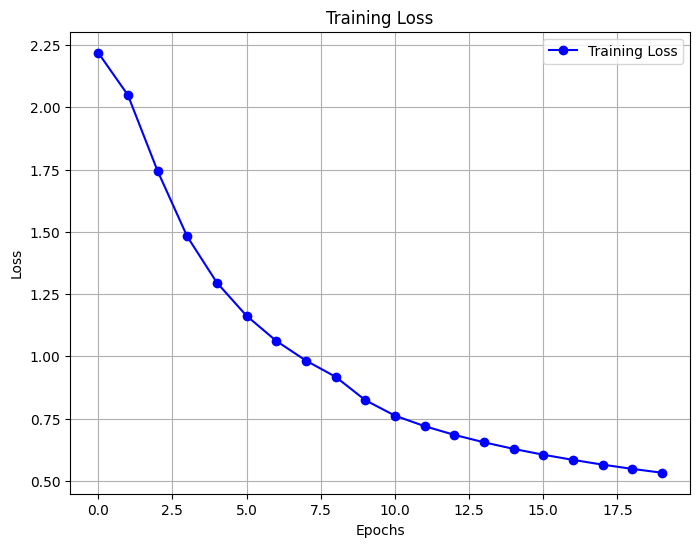

range(0, 20)


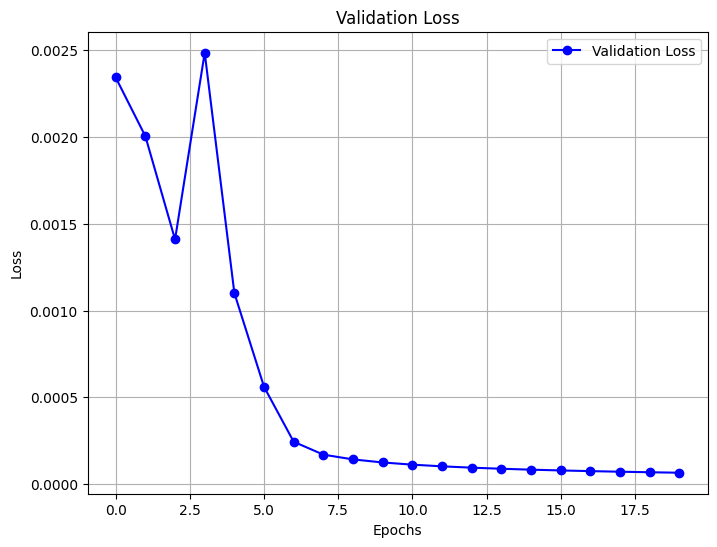

In [85]:
plot_loss_graph(train_loss_list,20,"Training Loss")

plot_loss_graph(val_loss_list,20,"Validation Loss")

In [86]:
# Code to find misclassified images

map = {1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[]}  # Assuming you have 10 classes

model.eval()

test_loss = 0
with torch.inference_mode():
    for X, y in test_dataloader:
        test_pred = model(X)
        y = torch.squeeze(y)
        test_loss += loss_fn(test_pred, y)
        
        # Get the predicted labels and true labels
        predicted_labels = test_pred.argmax(dim=1)
        
        # Find the misclassified samples
        misclassified_indices = (predicted_labels != y).nonzero().squeeze()
        for index in misclassified_indices:
            true_label = y[index].item()
            true_label+=1
            predicted_label = predicted_labels[index].item() + 1
            if(len(map[true_label])<3):
                map[true_label].append((X[index], predicted_label))

# for i in range(1,11):
#     print(len(map[i]))

Class 1 Misclassified Examples:


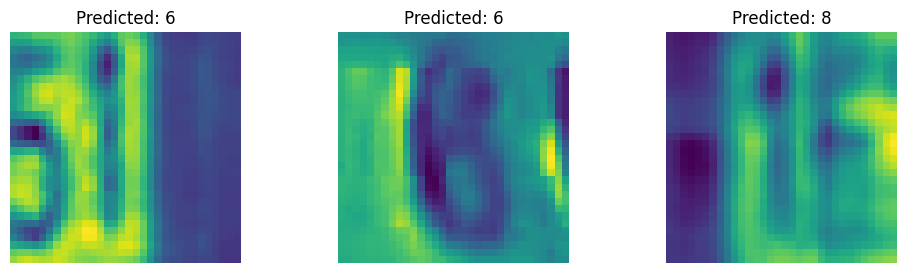

Class 2 Misclassified Examples:


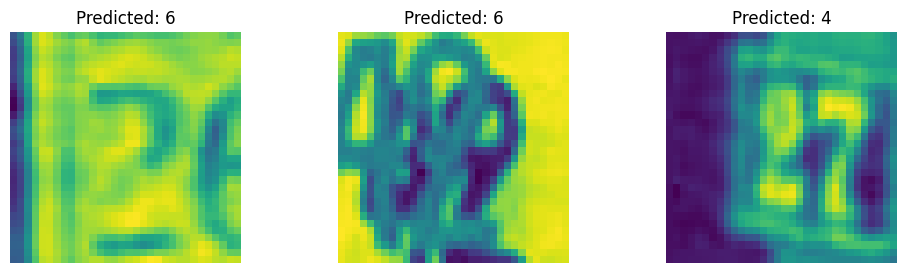

Class 3 Misclassified Examples:


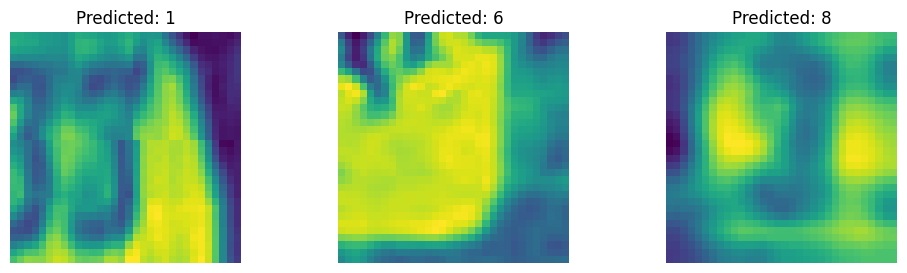

Class 4 Misclassified Examples:


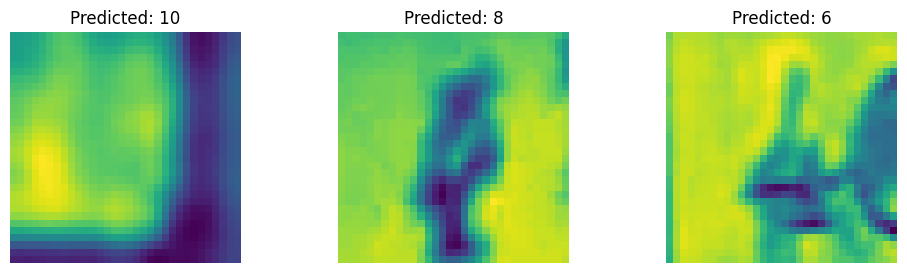

Class 5 Misclassified Examples:


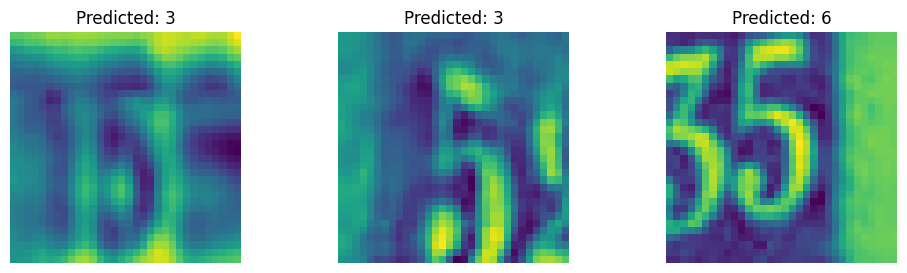

Class 6 Misclassified Examples:


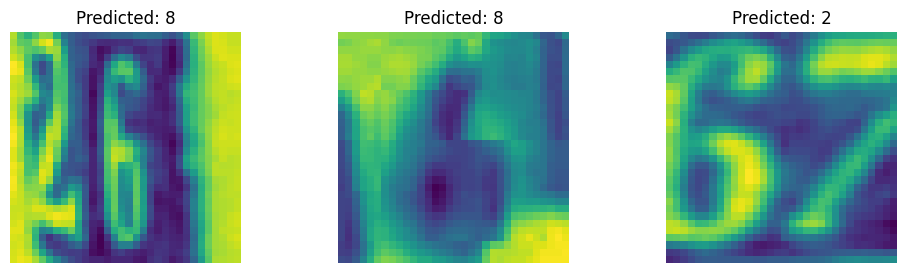

Class 7 Misclassified Examples:


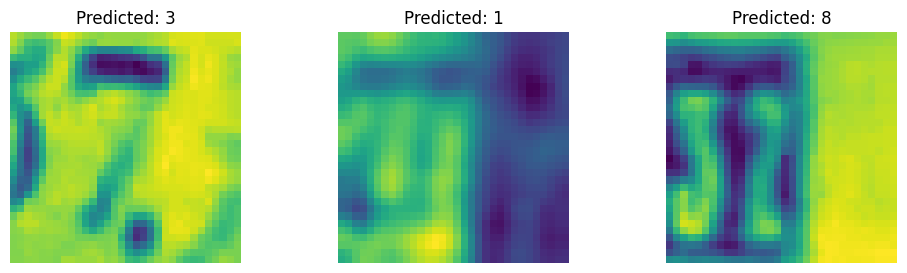

Class 8 Misclassified Examples:


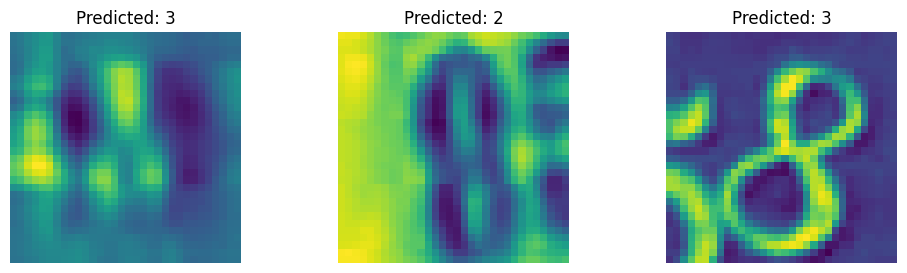

Class 9 Misclassified Examples:


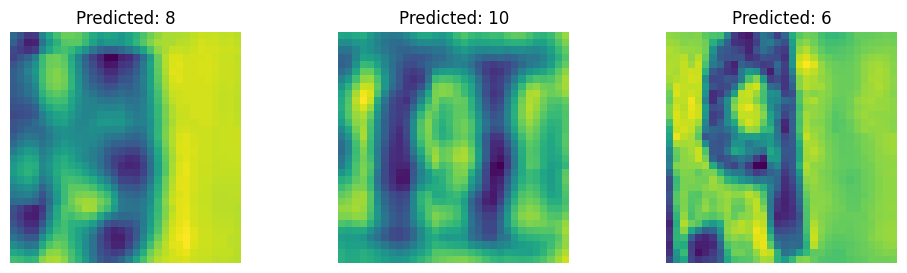

Class 10 Misclassified Examples:


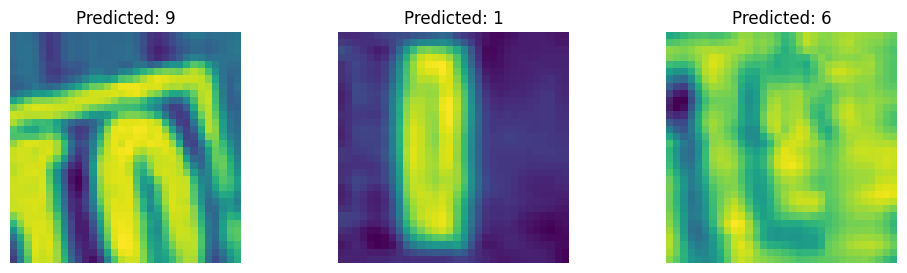

In [87]:
# Visualizing misclassified samples

for true_label, misclassified_samples in map.items():
    print(f"Class {true_label} Misclassified Examples:")
    fig, axes = plt.subplots(1, len(misclassified_samples), figsize=(12, 3))
    for i, (flattened_image, predicted_label) in enumerate(misclassified_samples):
        reshaped_image = flattened_image.reshape(32,32)
        axes[i].imshow(reshaped_image)
        axes[i].set_title(f"Predicted: {predicted_label}")
        axes[i].axis('off')

    plt.show()


## tanh

In [88]:
torch.manual_seed(42)

model = Model(1024,512,10,nn.Tanh()).double()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model.parameters(),
                            lr=0.1)

In [89]:
torch.manual_seed(42)

EPOCHS = 20

train_loss = 0

train_loss_list = []
test_loss_list_train = []
accuracy_list_train = []

val_loss_list = []
test_loss_list_val = []
accuracy_list_val = []

# training and testing loop
for epoch in tqdm(range(EPOCHS)):
    training_step(model,train_dataloader,X_train,y_train,train_loss_list,loss_fn,optimizer)
    testing_step(model,test_dataloader,X_test,y_test,test_loss_list_train,accuracy_list_train,loss_fn)

#training and validation loop
EPOCHS = 20
for epoch in tqdm(range(EPOCHS)):
    training_step(model,val_dataloader,X_val,y_val,val_loss_list,loss_fn,optimizer)
    testing_step(model,test_dataloader,X_test,y_test,test_loss_list_val,accuracy_list_val,loss_fn)

  0%|                                                    | 0/20 [00:00<?, ?it/s]

Looked at 0/515 samples.


  5%|██▏                                         | 1/20 [00:01<00:36,  1.94s/it]

Training loss : 2.1702947995451924 | Train acc: 30.2521| 
Test loss : 2.0863 | Test acc : 28.4195
Looked at 0/515 samples.


 10%|████▍                                       | 2/20 [00:03<00:33,  1.84s/it]

Training loss : 2.0133751210984716 | Train acc: 35.2941| 
Test loss : 1.9413 | Test acc : 32.1210
Looked at 0/515 samples.


 15%|██████▌                                     | 3/20 [00:05<00:30,  1.80s/it]

Training loss : 1.8663940534835766 | Train acc: 38.6555| 
Test loss : 1.7987 | Test acc : 36.5122
Looked at 0/515 samples.


 20%|████████▊                                   | 4/20 [00:07<00:28,  1.78s/it]

Training loss : 1.7471856303790385 | Train acc: 37.8151| 
Test loss : 1.7174 | Test acc : 38.1825
Looked at 0/515 samples.


 25%|███████████                                 | 5/20 [00:09<00:27,  1.81s/it]

Training loss : 1.6808665706727004 | Train acc: 39.4958| 
Test loss : 1.6758 | Test acc : 38.9296
Looked at 0/515 samples.


 30%|█████████████▏                              | 6/20 [00:10<00:25,  1.83s/it]

Training loss : 1.638993119433468 | Train acc: 37.8151| 
Test loss : 1.6462 | Test acc : 39.5627
Looked at 0/515 samples.


 35%|███████████████▍                            | 7/20 [00:12<00:23,  1.82s/it]

Training loss : 1.6055241537814513 | Train acc: 42.0168| 
Test loss : 1.6236 | Test acc : 40.3475
Looked at 0/515 samples.


 40%|█████████████████▌                          | 8/20 [00:14<00:21,  1.82s/it]

Training loss : 1.575582365821478 | Train acc: 43.6975| 
Test loss : 1.5977 | Test acc : 41.4054
Looked at 0/515 samples.


 45%|███████████████████▊                        | 9/20 [00:16<00:20,  1.83s/it]

Training loss : 1.5344174061761748 | Train acc: 44.5378| 
Test loss : 1.5230 | Test acc : 44.0894
Looked at 0/515 samples.


 50%|█████████████████████▌                     | 10/20 [00:18<00:18,  1.86s/it]

Training loss : 1.4293012676335068 | Train acc: 72.2689| 
Test loss : 1.3857 | Test acc : 68.9871
Looked at 0/515 samples.


 55%|███████████████████████▋                   | 11/20 [00:20<00:16,  1.88s/it]

Training loss : 1.2976055085715739 | Train acc: 72.2689| 
Test loss : 1.3208 | Test acc : 71.5194
Looked at 0/515 samples.


 60%|█████████████████████████▊                 | 12/20 [00:22<00:14,  1.86s/it]

Training loss : 1.2610321351578508 | Train acc: 74.7899| 
Test loss : 1.2969 | Test acc : 72.6643
Looked at 0/515 samples.


 65%|███████████████████████████▉               | 13/20 [00:23<00:12,  1.84s/it]

Training loss : 1.237155983205534 | Train acc: 75.6303| 
Test loss : 1.2817 | Test acc : 73.0954
Looked at 0/515 samples.


 70%|██████████████████████████████             | 14/20 [00:25<00:10,  1.83s/it]

Training loss : 1.2179024266686416 | Train acc: 77.3109| 
Test loss : 1.2684 | Test acc : 73.8362
Looked at 0/515 samples.


 75%|████████████████████████████████▎          | 15/20 [00:27<00:09,  1.85s/it]

Training loss : 1.2013048214829036 | Train acc: 78.1513| 
Test loss : 1.2571 | Test acc : 74.4558
Looked at 0/515 samples.


 80%|██████████████████████████████████▍        | 16/20 [00:29<00:07,  1.85s/it]

Training loss : 1.1865549083681286 | Train acc: 78.9916| 
Test loss : 1.2484 | Test acc : 74.8330
Looked at 0/515 samples.


 85%|████████████████████████████████████▌      | 17/20 [00:31<00:05,  1.90s/it]

Training loss : 1.1736270116875267 | Train acc: 80.6723| 
Test loss : 1.2407 | Test acc : 75.0521
Looked at 0/515 samples.


 90%|██████████████████████████████████████▋    | 18/20 [00:33<00:03,  1.89s/it]

Training loss : 1.1620001991456559 | Train acc: 81.5126| 
Test loss : 1.2331 | Test acc : 75.6313
Looked at 0/515 samples.


 95%|████████████████████████████████████████▊  | 19/20 [00:35<00:01,  1.91s/it]

Training loss : 1.1513936105281095 | Train acc: 82.3529| 
Test loss : 1.2271 | Test acc : 75.8333
Looked at 0/515 samples.


100%|███████████████████████████████████████████| 20/20 [00:37<00:00,  1.86s/it]


Training loss : 1.1417682012546295 | Train acc: 82.3529| 
Test loss : 1.2222 | Test acc : 76.1566


  0%|                                                    | 0/20 [00:00<?, ?it/s]

Looked at 0/1 samples.
Training loss : 0.002951621343973632 | Train acc: 65.0000| 
Test loss : 1.2485 | Test acc : 74.5061
Looked at 0/1 samples.
Training loss : 0.0022160499079187223 | Train acc: 80.0000| 


 10%|████▍                                       | 2/20 [00:00<00:01, 10.89it/s]

Test loss : 1.3874 | Test acc : 65.7435
Looked at 0/1 samples.
Training loss : 0.0021411148100553778 | Train acc: 85.0000| 


 20%|████████▊                                   | 4/20 [00:00<00:01, 10.95it/s]

Test loss : 1.3827 | Test acc : 64.9048
Looked at 0/1 samples.
Training loss : 0.0020009730857706216 | Train acc: 85.0000| 
Test loss : 1.3886 | Test acc : 65.3358
Looked at 0/1 samples.
Training loss : 0.001821564797749736 | Train acc: 90.0000| 
Test loss : 1.3526 | Test acc : 67.7074
Looked at 0/1 samples.
Training loss : 0.0017454701692591515 | Train acc: 95.0000| 


 30%|█████████████▏                              | 6/20 [00:00<00:01, 10.90it/s]

Test loss : 1.3552 | Test acc : 67.7613
Looked at 0/1 samples.
Training loss : 0.0017288671657652013 | Train acc: 95.0000| 
Test loss : 1.3439 | Test acc : 68.0136
Looked at 0/1 samples.
Training loss : 0.001722586612044644 | Train acc: 95.0000| 


 40%|█████████████████▌                          | 8/20 [00:00<00:01, 10.32it/s]

Test loss : 1.3450 | Test acc : 68.2022
Looked at 0/1 samples.
Training loss : 0.0017177999624055057 | Train acc: 95.0000| 
Test loss : 1.3412 | Test acc : 68.3504
Looked at 0/1 samples.
Training loss : 0.0017150089529648503 | Train acc: 95.0000| 


 50%|█████████████████████▌                     | 10/20 [00:00<00:01,  9.99it/s]

Test loss : 1.3400 | Test acc : 68.4716
Looked at 0/1 samples.
Training loss : 0.0017132914332020394 | Train acc: 95.0000| 
Test loss : 1.3387 | Test acc : 68.5390
Looked at 0/1 samples.
Training loss : 0.0017119063020685015 | Train acc: 95.0000| 


 65%|███████████████████████████▉               | 13/20 [00:01<00:00,  9.08it/s]

Test loss : 1.3376 | Test acc : 68.6737
Looked at 0/1 samples.
Training loss : 0.0017107386924787816 | Train acc: 95.0000| 
Test loss : 1.3367 | Test acc : 68.7276
Looked at 0/1 samples.
Training loss : 0.0017097353024489203 | Train acc: 95.0000| 


 75%|████████████████████████████████▎          | 15/20 [00:01<00:00,  8.15it/s]

Test loss : 1.3360 | Test acc : 68.8488
Looked at 0/1 samples.
Training loss : 0.0017088603455321808 | Train acc: 95.0000| 
Test loss : 1.3353 | Test acc : 68.9431
Looked at 0/1 samples.
Training loss : 0.0017080885113698468 | Train acc: 95.0000| 


 85%|████████████████████████████████████▌      | 17/20 [00:01<00:00,  9.03it/s]

Test loss : 1.3347 | Test acc : 69.0104
Looked at 0/1 samples.
Training loss : 0.0017074011981048135 | Train acc: 95.0000| 
Test loss : 1.3342 | Test acc : 69.0778
Looked at 0/1 samples.
Training loss : 0.001706784314104712 | Train acc: 95.0000| 
Test loss : 1.3337 | Test acc : 69.1451
Looked at 0/1 samples.
Training loss : 0.0017062269204927046 | Train acc: 95.0000| 


100%|███████████████████████████████████████████| 20/20 [00:02<00:00,  9.71it/s]

Test loss : 1.3333 | Test acc : 69.1855
Looked at 0/1 samples.
Training loss : 0.001705720353324993 | Train acc: 95.0000| 
Test loss : 1.3329 | Test acc : 69.2394


range(0, 20)


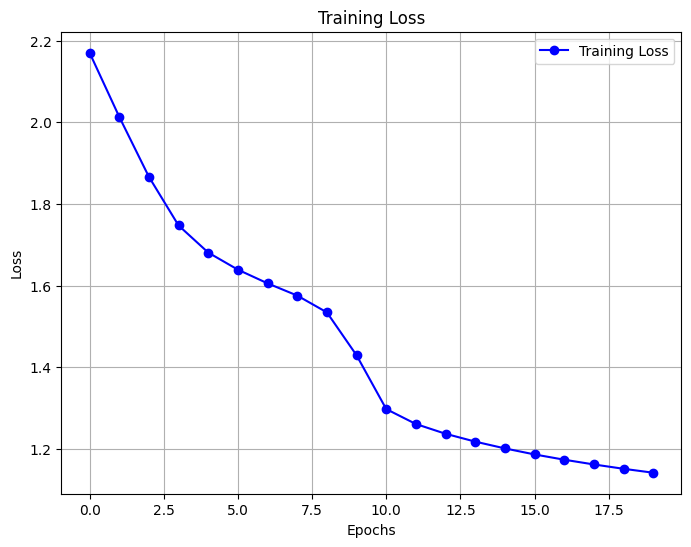

range(0, 20)


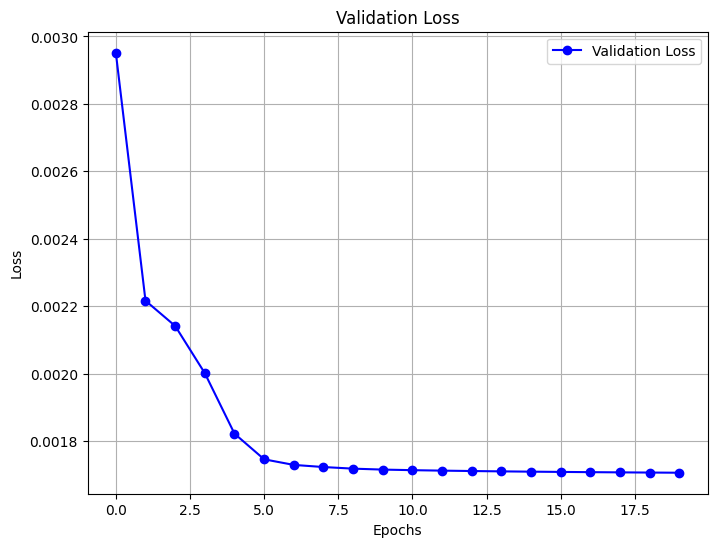

In [90]:
plot_loss_graph(train_loss_list,20,"Training Loss")

plot_loss_graph(val_loss_list,20,"Validation Loss")

In [91]:
# Code to find misclassified images

map = {1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[]}  # Assuming you have 10 classes

model.eval()

test_loss = 0
with torch.inference_mode():
    for X, y in test_dataloader:
        test_pred = model(X)
        y = torch.squeeze(y)
        test_loss += loss_fn(test_pred, y)
        
        # Get the predicted labels and true labels
        predicted_labels = test_pred.argmax(dim=1)
        
        # Find the misclassified samples
        misclassified_indices = (predicted_labels != y).nonzero().squeeze()
        for index in misclassified_indices:
            true_label = y[index].item()
            true_label+=1
            predicted_label = predicted_labels[index].item() + 1
            if(len(map[true_label])<3):
                map[true_label].append((X[index], predicted_label))

# for i in range(1,11):
#     print(len(map[i]))

Class 1 Misclassified Examples:


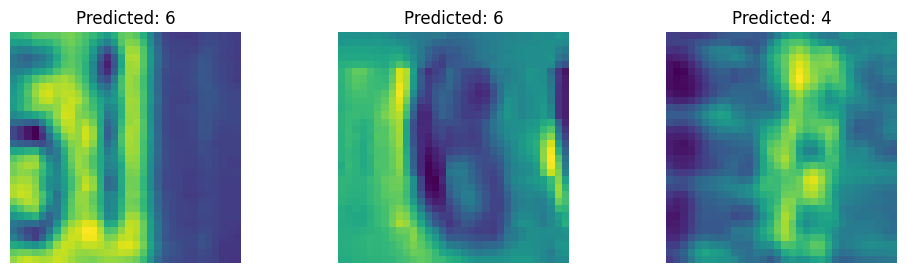

Class 2 Misclassified Examples:


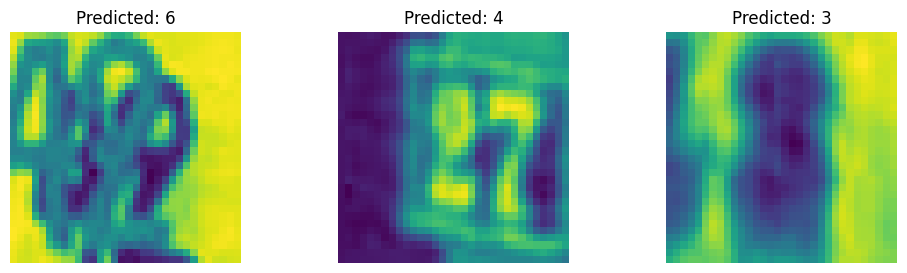

Class 3 Misclassified Examples:


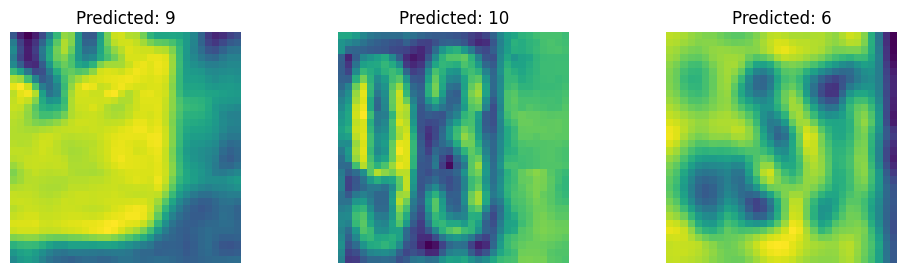

Class 4 Misclassified Examples:


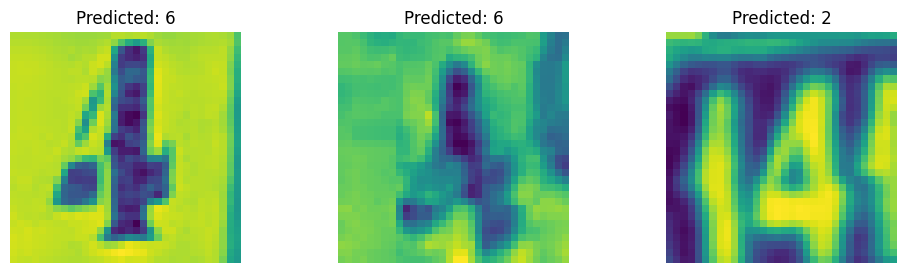

Class 5 Misclassified Examples:


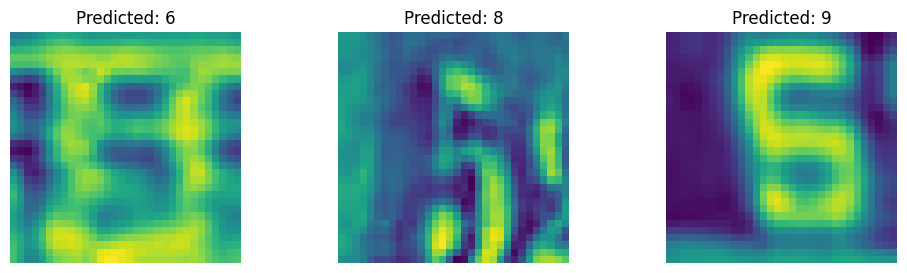

Class 6 Misclassified Examples:


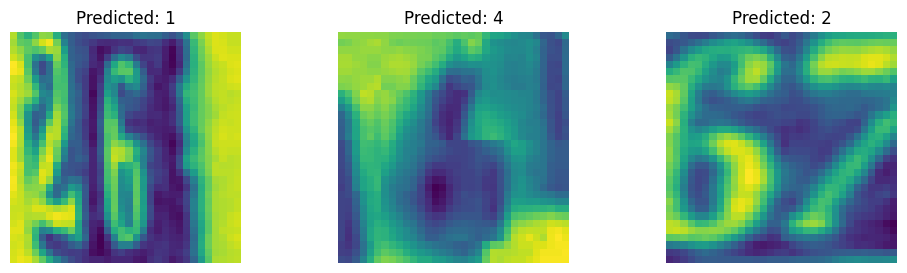

Class 7 Misclassified Examples:


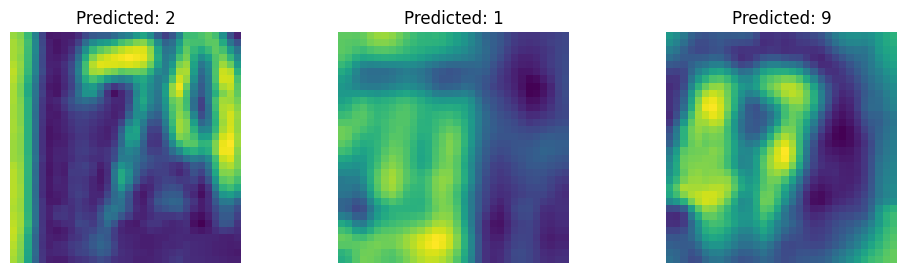

Class 8 Misclassified Examples:


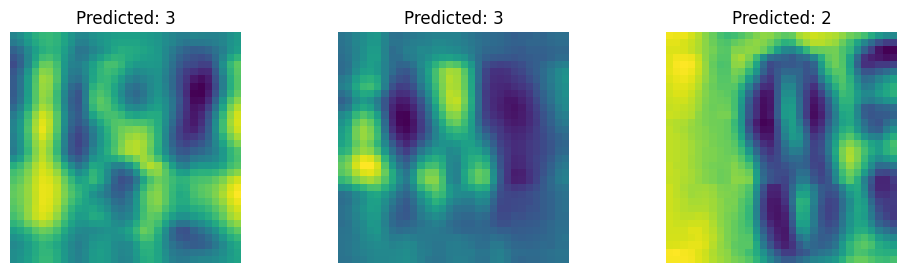

Class 9 Misclassified Examples:


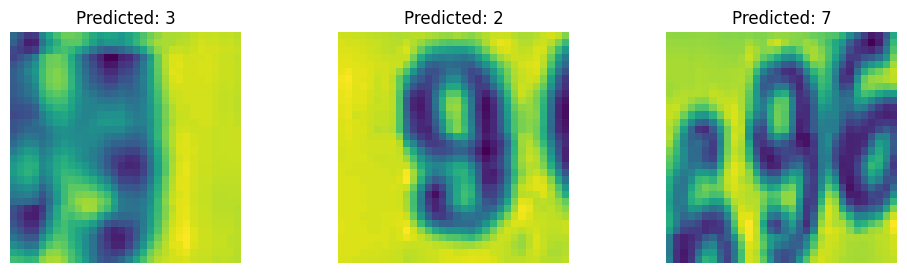

Class 10 Misclassified Examples:


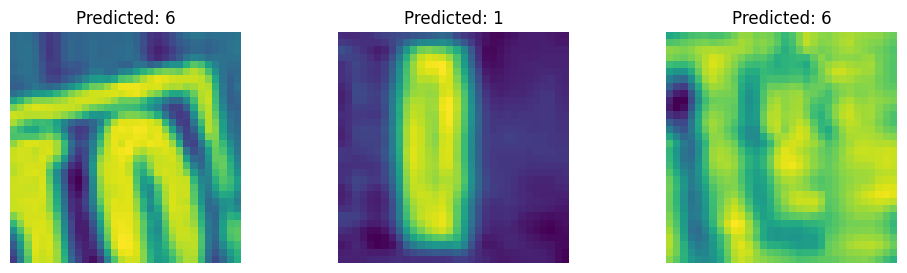

In [92]:
# Visualizing misclassified samples

for true_label, misclassified_samples in map.items():
    print(f"Class {true_label} Misclassified Examples:")
    fig, axes = plt.subplots(1, len(misclassified_samples), figsize=(12, 3))
    for i, (flattened_image, predicted_label) in enumerate(misclassified_samples):
        reshaped_image = flattened_image.reshape(32,32)
        axes[i].imshow(reshaped_image)
        axes[i].set_title(f"Predicted: {predicted_label}")
        axes[i].axis('off')

    plt.show()


## Sigmoid

In [119]:
torch.manual_seed(42)

model = Model(1024,512,10,nn.Sigmoid()).double()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model.parameters(),
                            lr=5)

In [120]:
torch.manual_seed(3)

EPOCHS = 20

train_loss = 0

train_loss_list = []
test_loss_list_train = []
accuracy_list_train = []

val_loss_list = []
test_loss_list_val = []
accuracy_list_val = []

# training and testing loop
for epoch in tqdm(range(EPOCHS)):
    training_step(model,train_dataloader,X_train,y_train,train_loss_list,loss_fn,optimizer)
    testing_step(model,test_dataloader,X_test,y_test,test_loss_list_train,accuracy_list_train,loss_fn)

#training and validation loop
EPOCHS = 20
for epoch in tqdm(range(EPOCHS)):
    training_step(model,val_dataloader,X_val,y_val,val_loss_list,loss_fn,optimizer)
    testing_step(model,test_dataloader,X_test,y_test,test_loss_list_val,accuracy_list_val,loss_fn)

  0%|                                                    | 0/20 [00:00<?, ?it/s]

Looked at 0/515 samples.


  5%|██▏                                         | 1/20 [00:02<00:38,  2.03s/it]

Training loss : 2.2363603631295867 | Train acc: 18.4874| 
Test loss : 2.2279 | Test acc : 18.1483
Looked at 0/515 samples.


 10%|████▍                                       | 2/20 [00:03<00:34,  1.93s/it]

Training loss : 2.1283372237911844 | Train acc: 31.0924| 
Test loss : 2.0273 | Test acc : 29.8545
Looked at 0/515 samples.


 15%|██████▌                                     | 3/20 [00:05<00:31,  1.85s/it]

Training loss : 1.9625220843994553 | Train acc: 42.0168| 
Test loss : 1.9256 | Test acc : 45.1096
Looked at 0/515 samples.


 20%|████████▊                                   | 4/20 [00:07<00:29,  1.82s/it]

Training loss : 1.882635397597184 | Train acc: 49.5798| 
Test loss : 1.8645 | Test acc : 54.2565
Looked at 0/515 samples.


 25%|███████████                                 | 5/20 [00:09<00:26,  1.79s/it]

Training loss : 1.8473374408280496 | Train acc: 52.9412| 
Test loss : 1.8499 | Test acc : 57.0654
Looked at 0/515 samples.


 30%|█████████████▏                              | 6/20 [00:10<00:24,  1.78s/it]

Training loss : 1.828728708789674 | Train acc: 55.4622| 
Test loss : 1.8308 | Test acc : 59.9892
Looked at 0/515 samples.


 35%|███████████████▍                            | 7/20 [00:12<00:22,  1.77s/it]

Training loss : 1.8134139397725284 | Train acc: 58.8235| 
Test loss : 1.8246 | Test acc : 60.5783
Looked at 0/515 samples.


 40%|█████████████████▌                          | 8/20 [00:14<00:21,  1.80s/it]

Training loss : 1.8006588533606478 | Train acc: 57.9832| 
Test loss : 1.8132 | Test acc : 61.5113
Looked at 0/515 samples.


 45%|███████████████████▊                        | 9/20 [00:16<00:19,  1.79s/it]

Training loss : 1.7914482816853503 | Train acc: 58.8235| 
Test loss : 1.8046 | Test acc : 62.2252
Looked at 0/515 samples.


 50%|█████████████████████▌                     | 10/20 [00:18<00:18,  1.80s/it]

Training loss : 1.783060164241069 | Train acc: 57.9832| 
Test loss : 1.8005 | Test acc : 62.9221
Looked at 0/515 samples.


 55%|███████████████████████▋                   | 11/20 [00:19<00:16,  1.79s/it]

Training loss : 1.7771442455278257 | Train acc: 58.8235| 
Test loss : 1.7955 | Test acc : 63.4070
Looked at 0/515 samples.


 60%|█████████████████████████▊                 | 12/20 [00:21<00:14,  1.81s/it]

Training loss : 1.770973233391466 | Train acc: 60.5042| 
Test loss : 1.7906 | Test acc : 63.5013
Looked at 0/515 samples.


 65%|███████████████████████████▉               | 13/20 [00:23<00:12,  1.79s/it]

Training loss : 1.7654414408403951 | Train acc: 59.6639| 
Test loss : 1.7886 | Test acc : 63.9727
Looked at 0/515 samples.


 70%|██████████████████████████████             | 14/20 [00:25<00:10,  1.80s/it]

Training loss : 1.7601759425358847 | Train acc: 57.1429| 
Test loss : 1.7870 | Test acc : 63.9691
Looked at 0/515 samples.


 75%|████████████████████████████████▎          | 15/20 [00:27<00:08,  1.78s/it]

Training loss : 1.756776319482787 | Train acc: 60.5042| 
Test loss : 1.7833 | Test acc : 64.5519
Looked at 0/515 samples.


 80%|██████████████████████████████████▍        | 16/20 [00:28<00:07,  1.77s/it]

Training loss : 1.7524505132360955 | Train acc: 61.3445| 
Test loss : 1.7850 | Test acc : 64.6327
Looked at 0/515 samples.


 85%|████████████████████████████████████▌      | 17/20 [00:30<00:05,  1.81s/it]

Training loss : 1.749010768180638 | Train acc: 61.3445| 
Test loss : 1.7824 | Test acc : 64.7001
Looked at 0/515 samples.


 90%|██████████████████████████████████████▋    | 18/20 [00:32<00:03,  1.82s/it]

Training loss : 1.7460254947558749 | Train acc: 59.6639| 
Test loss : 1.7845 | Test acc : 64.2152
Looked at 0/515 samples.


 95%|████████████████████████████████████████▊  | 19/20 [00:34<00:01,  1.80s/it]

Training loss : 1.7428199619287892 | Train acc: 60.5042| 
Test loss : 1.7856 | Test acc : 64.4343
Looked at 0/515 samples.


100%|███████████████████████████████████████████| 20/20 [00:36<00:00,  1.80s/it]


Training loss : 1.734471666746056 | Train acc: 63.0252| 
Test loss : 1.7658 | Test acc : 66.6667


  0%|                                                    | 0/20 [00:00<?, ?it/s]

Looked at 0/1 samples.
Training loss : 0.0038547688016138436 | Train acc: 50.0000| 


  5%|██▏                                         | 1/20 [00:00<00:01,  9.51it/s]

Test loss : 1.8233 | Test acc : 59.6615
Looked at 0/1 samples.
Training loss : 0.003643237530322138 | Train acc: 55.0000| 


 10%|████▍                                       | 2/20 [00:00<00:01,  9.45it/s]

Test loss : 1.8450 | Test acc : 57.0214
Looked at 0/1 samples.
Training loss : 0.0033965084617545585 | Train acc: 65.0000| 


 15%|██████▌                                     | 3/20 [00:00<00:01,  9.57it/s]

Test loss : 1.8738 | Test acc : 55.9743
Looked at 0/1 samples.
Training loss : 0.0035070458105504443 | Train acc: 65.0000| 


 20%|████████▊                                   | 4/20 [00:00<00:01,  9.20it/s]

Test loss : 1.8488 | Test acc : 57.4291
Looked at 0/1 samples.
Training loss : 0.0034132981694864756 | Train acc: 65.0000| 


 25%|███████████                                 | 5/20 [00:00<00:01,  9.15it/s]

Test loss : 1.8573 | Test acc : 54.4181
Looked at 0/1 samples.
Training loss : 0.003537053196630839 | Train acc: 65.0000| 


 30%|█████████████▏                              | 6/20 [00:00<00:01,  9.22it/s]

Test loss : 1.8744 | Test acc : 54.3005
Looked at 0/1 samples.
Training loss : 0.003434265810032632 | Train acc: 65.0000| 


 40%|█████████████████▌                          | 8/20 [00:00<00:01,  9.73it/s]

Test loss : 1.8759 | Test acc : 54.3678
Looked at 0/1 samples.
Training loss : 0.0034191795577855682 | Train acc: 60.0000| 
Test loss : 1.8691 | Test acc : 54.8527
Looked at 0/1 samples.
Training loss : 0.0034152527631394355 | Train acc: 65.0000| 


 45%|███████████████████▊                        | 9/20 [00:00<00:01,  9.75it/s]

Test loss : 1.8694 | Test acc : 54.8258


 50%|█████████████████████▌                     | 10/20 [00:01<00:01,  9.68it/s]

Looked at 0/1 samples.
Training loss : 0.0034149952970456286 | Train acc: 65.0000| 
Test loss : 1.8696 | Test acc : 54.8393
Looked at 0/1 samples.
Training loss : 0.0034148101953523796 | Train acc: 65.0000| 


 60%|█████████████████████████▊                 | 12/20 [00:01<00:00,  9.30it/s]

Test loss : 1.8698 | Test acc : 54.8258
Looked at 0/1 samples.
Training loss : 0.0034146600376089593 | Train acc: 65.0000| 
Test loss : 1.8698 | Test acc : 54.8123
Looked at 0/1 samples.
Training loss : 0.0034145250404359123 | Train acc: 65.0000| 


 70%|██████████████████████████████             | 14/20 [00:01<00:00,  8.85it/s]

Test loss : 1.8698 | Test acc : 54.7989
Looked at 0/1 samples.
Training loss : 0.003414387892730398 | Train acc: 65.0000| 
Test loss : 1.8697 | Test acc : 54.7854
Looked at 0/1 samples.
Training loss : 0.003414220882858559 | Train acc: 65.0000| 


 80%|██████████████████████████████████▍        | 16/20 [00:01<00:00,  7.30it/s]

Test loss : 1.8694 | Test acc : 54.8123
Looked at 0/1 samples.
Training loss : 0.0034139476070671215 | Train acc: 65.0000| 
Test loss : 1.8688 | Test acc : 54.9066
Looked at 0/1 samples.
Training loss : 0.0034132111682711234 | Train acc: 65.0000| 


 90%|██████████████████████████████████████▋    | 18/20 [00:02<00:00,  6.87it/s]

Test loss : 1.8674 | Test acc : 55.0144
Looked at 0/1 samples.
Training loss : 0.003408798051441456 | Train acc: 65.0000| 
Test loss : 1.8637 | Test acc : 55.3547
Looked at 0/1 samples.
Training loss : 0.0034010937851025372 | Train acc: 70.0000| 


100%|███████████████████████████████████████████| 20/20 [00:02<00:00,  8.30it/s]

Test loss : 1.8638 | Test acc : 55.3278
Looked at 0/1 samples.
Training loss : 0.0034010469797633733 | Train acc: 70.0000| 
Test loss : 1.8640 | Test acc : 55.3278


range(0, 20)


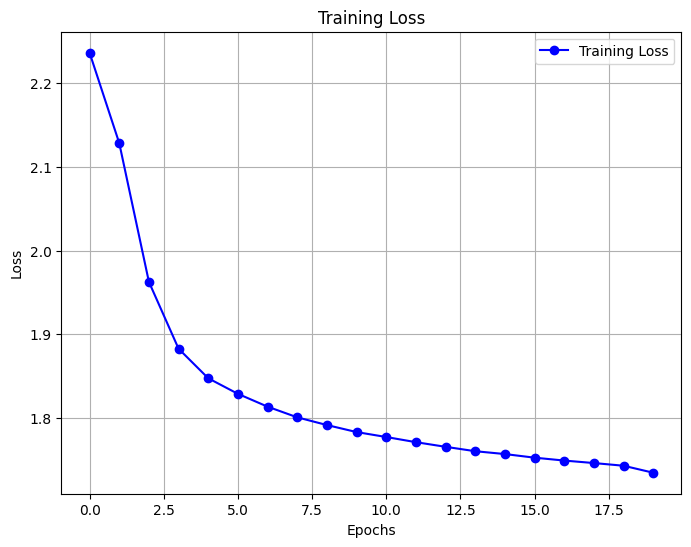

range(0, 20)


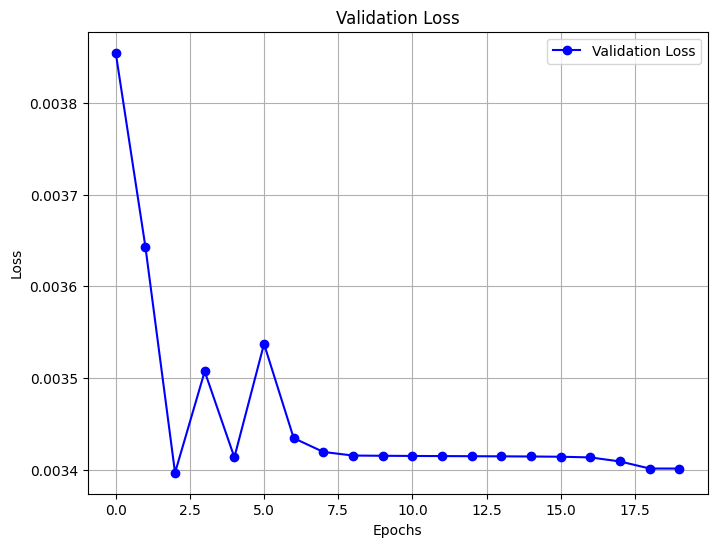

In [121]:
plot_loss_graph(train_loss_list,20,"Training Loss")

plot_loss_graph(val_loss_list,20,"Validation Loss")

In [56]:
# Code to find misclassified images

map = {1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[]}  # Assuming you have 10 classes

model.eval()

test_loss = 0
with torch.inference_mode():
    for X, y in test_dataloader:
        test_pred = model(X)
        y = torch.squeeze(y)
        test_loss += loss_fn(test_pred, y)
        
        # Get the predicted labels and true labels
        predicted_labels = test_pred.argmax(dim=1)
        
        # Find the misclassified samples
        misclassified_indices = (predicted_labels != y).nonzero().squeeze()
        for index in misclassified_indices:
            true_label = y[index].item()
            true_label+=1
            predicted_label = predicted_labels[index].item() + 1
            if(len(map[true_label])<3):
                map[true_label].append((X[index], predicted_label))

# for i in range(1,11):
#     print(len(map[i]))

Class 1 Misclassified Examples:


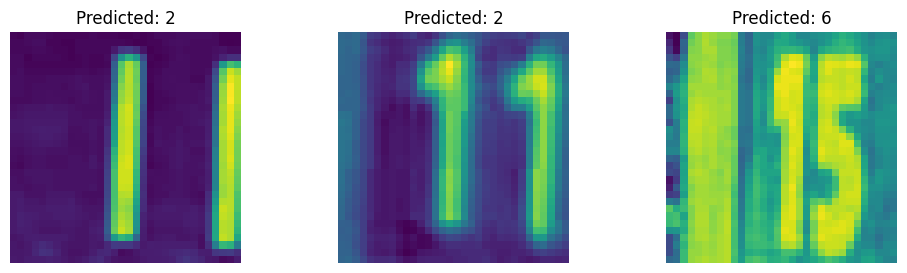

Class 2 Misclassified Examples:


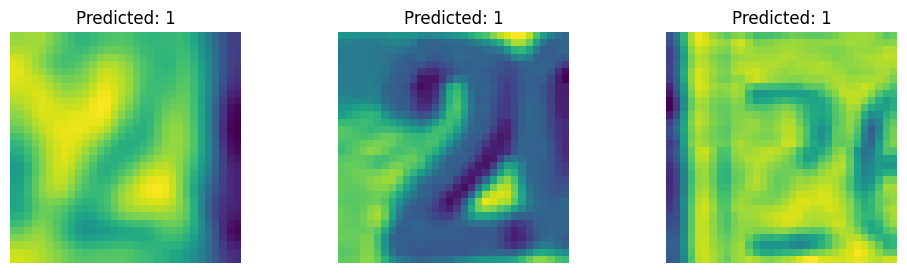

Class 3 Misclassified Examples:


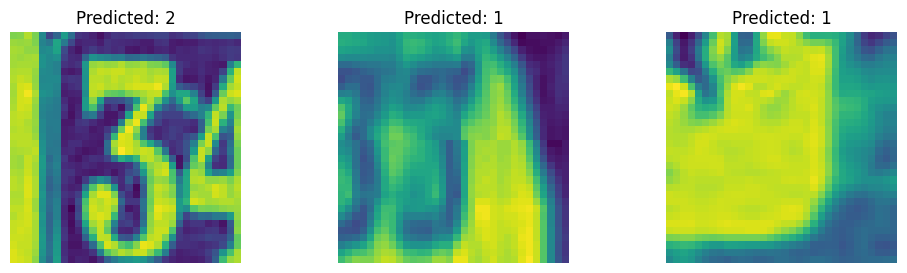

Class 4 Misclassified Examples:


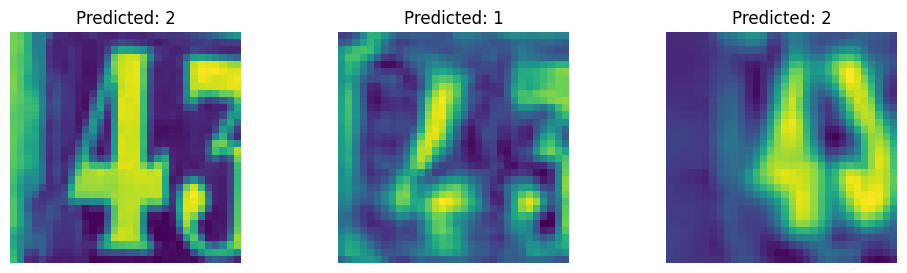

Class 5 Misclassified Examples:


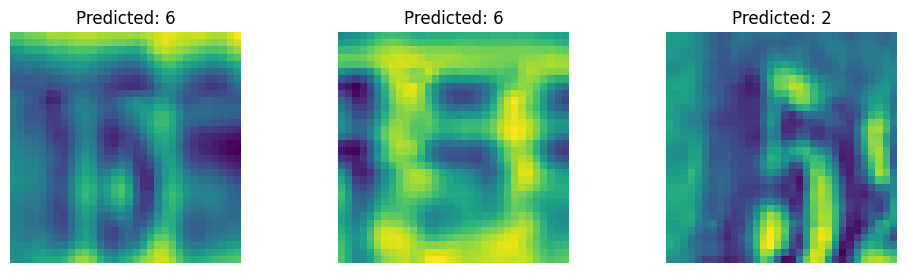

Class 6 Misclassified Examples:


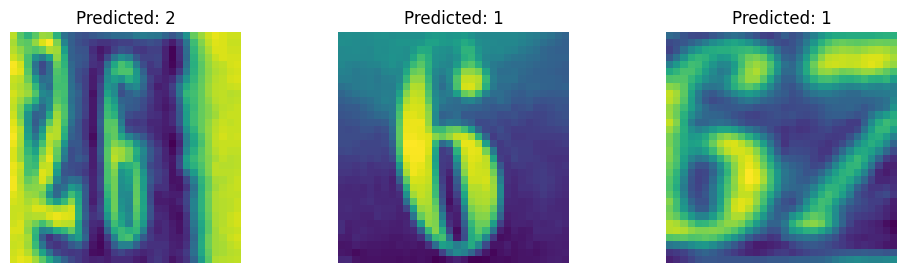

Class 7 Misclassified Examples:


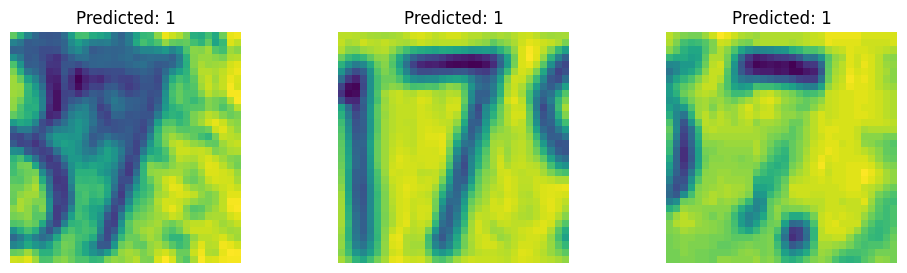

Class 8 Misclassified Examples:


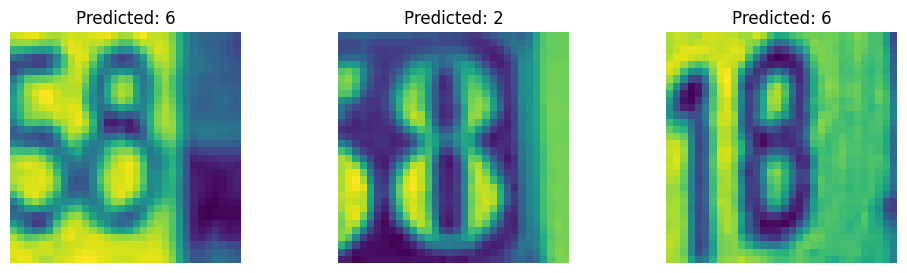

Class 9 Misclassified Examples:


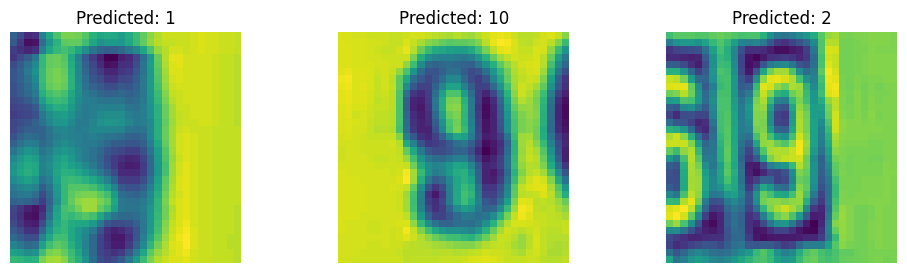

Class 10 Misclassified Examples:


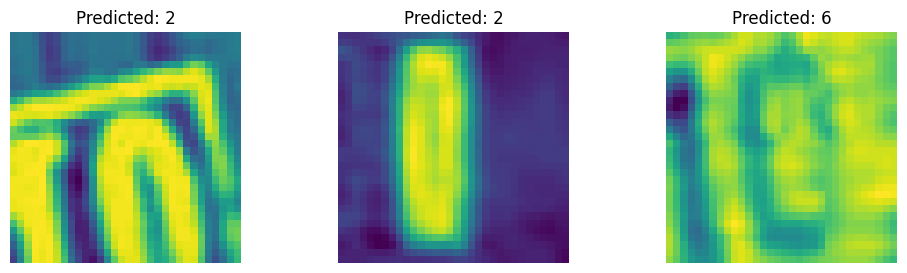

In [47]:
# Visualizing misclassified samples

for true_label, misclassified_samples in map.items():
    print(f"Class {true_label} Misclassified Examples:")
    fig, axes = plt.subplots(1, len(misclassified_samples), figsize=(12, 3))
    for i, (flattened_image, predicted_label) in enumerate(misclassified_samples):
        reshaped_image = flattened_image.reshape(32,32)
        axes[i].imshow(reshaped_image)
        axes[i].set_title(f"Predicted: {predicted_label}")
        axes[i].axis('off')

    plt.show()


## Linear

In [126]:
torch.manual_seed(42)

model = Model(1024,512,10,nn.Identity()).double()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model.parameters(),
                            lr=0.1)

In [127]:
torch.manual_seed(42)

EPOCHS = 20

train_loss = 0

train_loss_list = []
test_loss_list_train = []
accuracy_list_train = []

val_loss_list = []
test_loss_list_val = []
accuracy_list_val = []

# training and testing loop
for epoch in tqdm(range(EPOCHS)):
    training_step(model,train_dataloader,X_train,y_train,train_loss_list,loss_fn,optimizer)
    testing_step(model,test_dataloader,X_test,y_test,test_loss_list_train,accuracy_list_train,loss_fn)

#training and validation loop
EPOCHS = 20
for epoch in tqdm(range(EPOCHS)):
    training_step(model,val_dataloader,X_val,y_val,val_loss_list,loss_fn,optimizer)
    testing_step(model,test_dataloader,X_test,y_test,test_loss_list_val,accuracy_list_val,loss_fn)

  0%|                                                    | 0/20 [00:00<?, ?it/s]

Looked at 0/515 samples.


  5%|██▏                                         | 1/20 [00:01<00:30,  1.62s/it]

Training loss : 2.213646578492915 | Train acc: 23.5294| 
Test loss : 2.2001 | Test acc : 23.1492
Looked at 0/515 samples.


 10%|████▍                                       | 2/20 [00:03<00:29,  1.67s/it]

Training loss : 2.188486267438495 | Train acc: 23.5294| 
Test loss : 2.1951 | Test acc : 23.6710
Looked at 0/515 samples.


 15%|██████▌                                     | 3/20 [00:04<00:27,  1.62s/it]

Training loss : 2.1825485321628046 | Train acc: 23.5294| 
Test loss : 2.1927 | Test acc : 24.3077
Looked at 0/515 samples.


 20%|████████▊                                   | 4/20 [00:06<00:25,  1.61s/it]

Training loss : 2.178982237297521 | Train acc: 23.5294| 
Test loss : 2.1912 | Test acc : 24.4962
Looked at 0/515 samples.


 25%|███████████                                 | 5/20 [00:08<00:23,  1.60s/it]

Training loss : 2.176459477678754 | Train acc: 23.5294| 
Test loss : 2.1903 | Test acc : 24.7522
Looked at 0/515 samples.


 30%|█████████████▏                              | 6/20 [00:09<00:22,  1.59s/it]

Training loss : 2.1745256929536634 | Train acc: 23.5294| 
Test loss : 2.1897 | Test acc : 24.9811
Looked at 0/515 samples.


 35%|███████████████▍                            | 7/20 [00:11<00:20,  1.59s/it]

Training loss : 2.172969457202368 | Train acc: 23.5294| 
Test loss : 2.1892 | Test acc : 25.1464
Looked at 0/515 samples.


 40%|█████████████████▌                          | 8/20 [00:12<00:19,  1.58s/it]

Training loss : 2.1716750716121145 | Train acc: 23.5294| 
Test loss : 2.1889 | Test acc : 25.1868
Looked at 0/515 samples.


 45%|███████████████████▊                        | 9/20 [00:14<00:18,  1.65s/it]

Training loss : 2.1705723009334617 | Train acc: 22.6891| 
Test loss : 2.1887 | Test acc : 25.2541
Looked at 0/515 samples.


 50%|█████████████████████▌                     | 10/20 [00:16<00:16,  1.68s/it]

Training loss : 2.1696152885968023 | Train acc: 23.5294| 
Test loss : 2.1886 | Test acc : 25.3655
Looked at 0/515 samples.


 55%|███████████████████████▋                   | 11/20 [00:18<00:15,  1.69s/it]

Training loss : 2.1687724370256922 | Train acc: 23.5294| 
Test loss : 2.1884 | Test acc : 25.5271
Looked at 0/515 samples.


 60%|█████████████████████████▊                 | 12/20 [00:19<00:13,  1.72s/it]

Training loss : 2.168021060823396 | Train acc: 23.5294| 
Test loss : 2.1884 | Test acc : 25.5406
Looked at 0/515 samples.


 65%|███████████████████████████▉               | 13/20 [00:21<00:12,  1.75s/it]

Training loss : 2.167344344816029 | Train acc: 23.5294| 
Test loss : 2.1883 | Test acc : 25.5271
Looked at 0/515 samples.


 70%|██████████████████████████████             | 14/20 [00:23<00:10,  1.72s/it]

Training loss : 2.1667295066920387 | Train acc: 23.5294| 
Test loss : 2.1883 | Test acc : 25.5675
Looked at 0/515 samples.


 75%|████████████████████████████████▎          | 15/20 [00:25<00:08,  1.74s/it]

Training loss : 2.166166631128905 | Train acc: 23.5294| 
Test loss : 2.1883 | Test acc : 25.5136
Looked at 0/515 samples.


 80%|██████████████████████████████████▍        | 16/20 [00:26<00:07,  1.75s/it]

Training loss : 2.1656478993665305 | Train acc: 23.5294| 
Test loss : 2.1882 | Test acc : 25.5541
Looked at 0/515 samples.


 85%|████████████████████████████████████▌      | 17/20 [00:28<00:05,  1.74s/it]

Training loss : 2.16516706285561 | Train acc: 23.5294| 
Test loss : 2.1883 | Test acc : 25.5810
Looked at 0/515 samples.


 90%|██████████████████████████████████████▋    | 18/20 [00:30<00:03,  1.74s/it]

Training loss : 2.1647190734189237 | Train acc: 23.5294| 
Test loss : 2.1883 | Test acc : 25.5675
Looked at 0/515 samples.


 95%|████████████████████████████████████████▊  | 19/20 [00:32<00:01,  1.74s/it]

Training loss : 2.1642998166051344 | Train acc: 23.5294| 
Test loss : 2.1883 | Test acc : 25.6214
Looked at 0/515 samples.


100%|███████████████████████████████████████████| 20/20 [00:33<00:00,  1.69s/it]


Training loss : 2.163905914221956 | Train acc: 23.5294| 
Test loss : 2.1883 | Test acc : 25.6618


  0%|                                                    | 0/20 [00:00<?, ?it/s]

Looked at 0/1 samples.
Training loss : 0.004769929052591875 | Train acc: 15.0000| 
Test loss : 2.2035 | Test acc : 24.4630
Looked at 0/1 samples.
Training loss : 0.004219765882236273 | Train acc: 20.0000| 


 10%|████▍                                       | 2/20 [00:00<00:01, 10.74it/s]

Test loss : 2.2400 | Test acc : 23.2597
Looked at 0/1 samples.
Training loss : 0.003759186203193894 | Train acc: 40.0000| 


 20%|████████▊                                   | 4/20 [00:00<00:01, 10.56it/s]

Test loss : 2.2952 | Test acc : 21.3569
Looked at 0/1 samples.
Training loss : 0.0033844208510860653 | Train acc: 45.0000| 
Test loss : 2.3360 | Test acc : 21.0677
Looked at 0/1 samples.
Training loss : 0.0030683396094148864 | Train acc: 55.0000| 
Test loss : 2.3801 | Test acc : 20.7139
Looked at 0/1 samples.
Training loss : 0.002775878537624813 | Train acc: 60.0000| 


 30%|█████████████▏                              | 6/20 [00:00<00:01, 10.56it/s]

Test loss : 2.4367 | Test acc : 19.9533
Looked at 0/1 samples.
Training loss : 0.0025037540015317526 | Train acc: 60.0000| 
Test loss : 2.5051 | Test acc : 18.5390
Looked at 0/1 samples.
Training loss : 0.0022550128033613772 | Train acc: 75.0000| 


 40%|█████████████████▌                          | 8/20 [00:00<00:01, 10.64it/s]

Test loss : 2.5873 | Test acc : 18.0172
Looked at 0/1 samples.
Training loss : 0.0020318444623913276 | Train acc: 75.0000| 
Test loss : 2.6766 | Test acc : 17.0070
Looked at 0/1 samples.
Training loss : 0.0018321911248872875 | Train acc: 80.0000| 


 50%|█████████████████████▌                     | 10/20 [00:01<00:01,  9.05it/s]

Test loss : 2.7719 | Test acc : 16.3497
Looked at 0/1 samples.
Training loss : 0.0016516826159342624 | Train acc: 80.0000| 


 60%|█████████████████████████▊                 | 12/20 [00:01<00:00,  9.54it/s]

Test loss : 2.8676 | Test acc : 15.7031
Looked at 0/1 samples.
Training loss : 0.0014868445749171913 | Train acc: 85.0000| 
Test loss : 2.9699 | Test acc : 15.4643
Looked at 0/1 samples.
Training loss : 0.0013361367383679496 | Train acc: 85.0000| 
Test loss : 3.0649 | Test acc : 15.1949
Looked at 0/1 samples.
Training loss : 0.0011998145714899576 | Train acc: 90.0000| 


 70%|██████████████████████████████             | 14/20 [00:01<00:00,  9.05it/s]

Test loss : 3.1922 | Test acc : 14.9560
Looked at 0/1 samples.
Training loss : 0.0010862549165307964 | Train acc: 85.0000| 


 75%|████████████████████████████████▎          | 15/20 [00:01<00:00,  8.73it/s]

Test loss : 3.2570 | Test acc : 14.6830
Looked at 0/1 samples.
Training loss : 0.001083246517008281 | Train acc: 80.0000| 


 80%|██████████████████████████████████▍        | 16/20 [00:01<00:00,  8.44it/s]

Test loss : 3.8085 | Test acc : 14.0230
Looked at 0/1 samples.
Training loss : 0.001941560147726318 | Train acc: 75.0000| 


 85%|████████████████████████████████████▌      | 17/20 [00:01<00:00,  8.52it/s]

Test loss : 5.4934 | Test acc : 14.9623
Looked at 0/1 samples.
Training loss : 0.00529445659520973 | Train acc: 60.0000| 
Test loss : 3.4032 | Test acc : 12.9454
Looked at 0/1 samples.
Training loss : 0.0015597285516282314 | Train acc: 65.0000| 


 95%|████████████████████████████████████████▊  | 19/20 [00:02<00:00,  9.52it/s]

Test loss : 3.6273 | Test acc : 15.3628
Looked at 0/1 samples.
Training loss : 0.0025303290688699393 | Train acc: 50.0000| 


100%|███████████████████████████████████████████| 20/20 [00:02<00:00,  9.51it/s]

Test loss : 3.9039 | Test acc : 11.3389


range(0, 20)


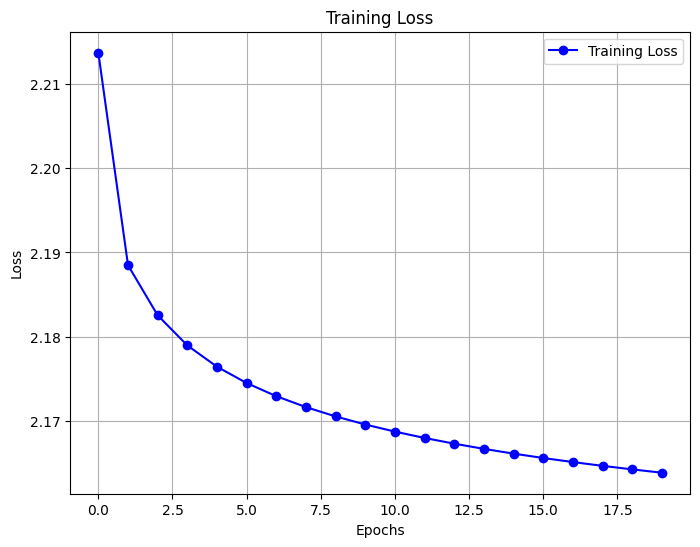

range(0, 20)


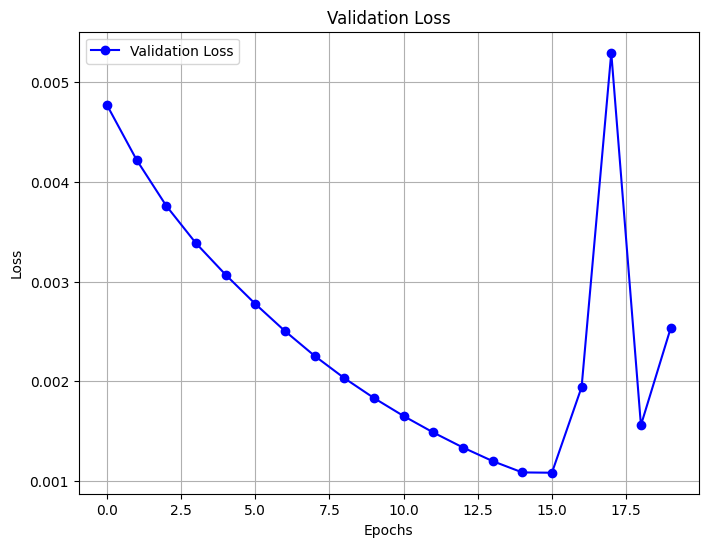

In [128]:
plot_loss_graph(train_loss_list,20,"Training Loss")

plot_loss_graph(val_loss_list,20,"Validation Loss")

In [129]:
# Code to find misclassified images

map = {1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[]}  # Assuming you have 10 classes

model.eval()

test_loss = 0
with torch.inference_mode():
    for X, y in test_dataloader:
        test_pred = model(X)
        y = torch.squeeze(y)
        test_loss += loss_fn(test_pred, y)
        
        # Get the predicted labels and true labels
        predicted_labels = test_pred.argmax(dim=1)
        
        # Find the misclassified samples
        misclassified_indices = (predicted_labels != y).nonzero().squeeze()
        for index in misclassified_indices:
            true_label = y[index].item()
            true_label+=1
            predicted_label = predicted_labels[index].item() + 1
            if(len(map[true_label])<3):
                map[true_label].append((X[index], predicted_label))

# for i in range(1,11):
#     print(len(map[i]))

Class 1 Misclassified Examples:


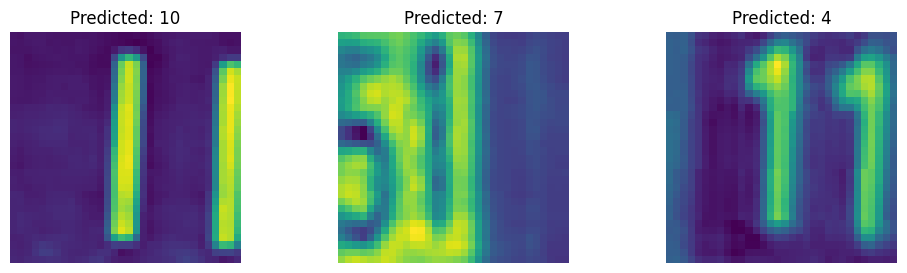

Class 2 Misclassified Examples:


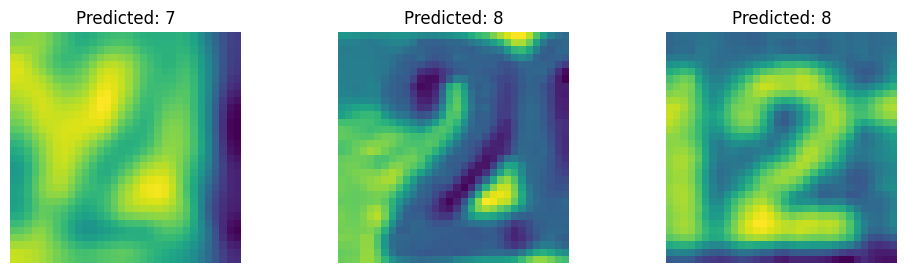

Class 3 Misclassified Examples:


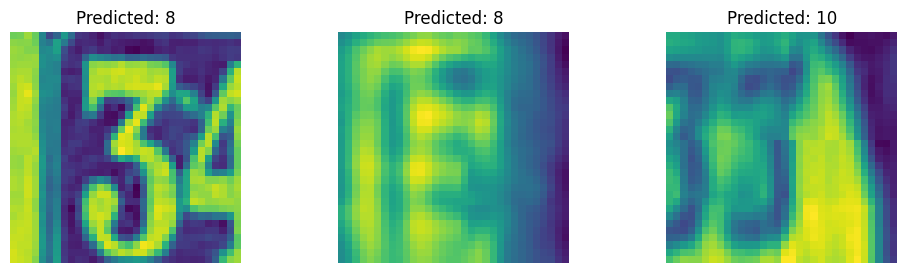

Class 4 Misclassified Examples:


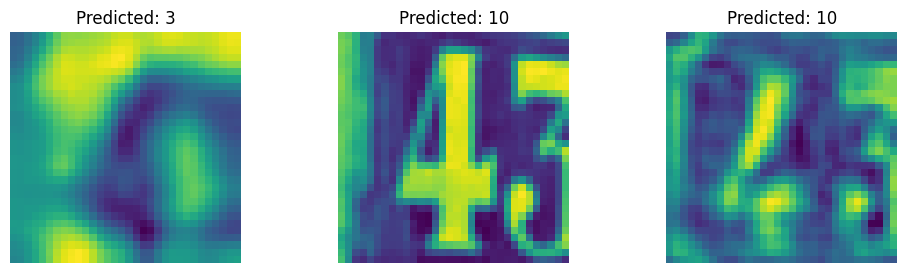

Class 5 Misclassified Examples:


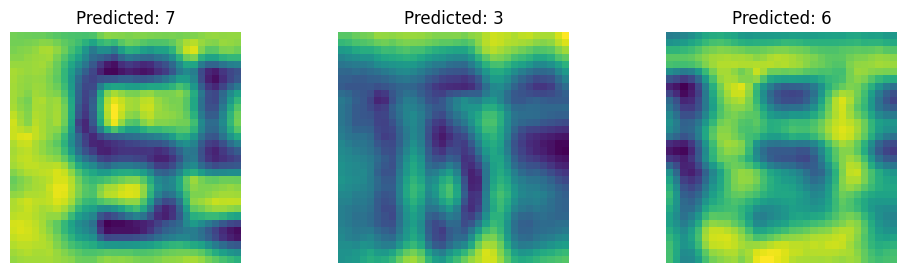

Class 6 Misclassified Examples:


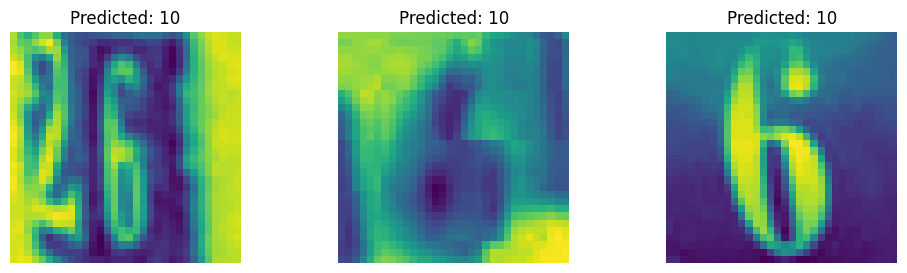

Class 7 Misclassified Examples:


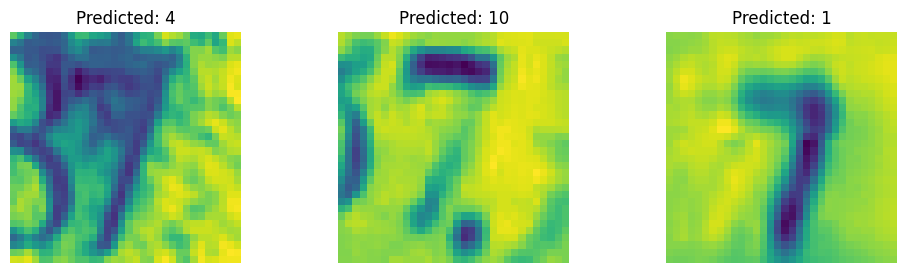

Class 8 Misclassified Examples:


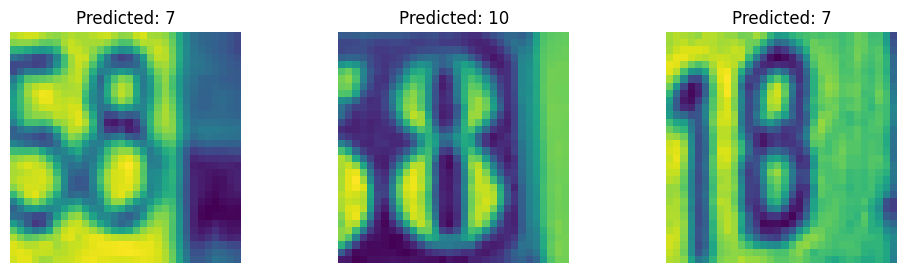

Class 9 Misclassified Examples:


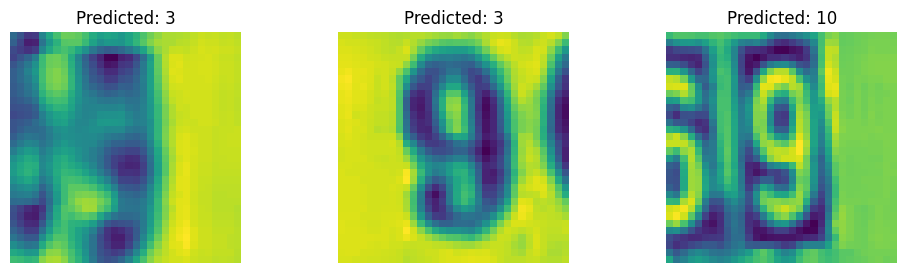

Class 10 Misclassified Examples:


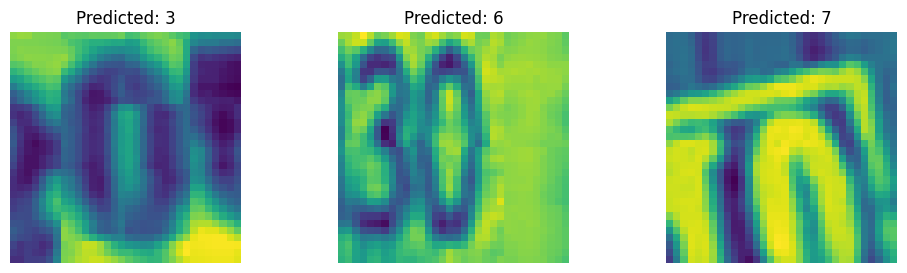

In [130]:
# Visualizing misclassified samples

for true_label, misclassified_samples in map.items():
    print(f"Class {true_label} Misclassified Examples:")
    fig, axes = plt.subplots(1, len(misclassified_samples), figsize=(12, 3))
    for i, (flattened_image, predicted_label) in enumerate(misclassified_samples):
        reshaped_image = flattened_image.reshape(32,32)
        axes[i].imshow(reshaped_image)
        axes[i].set_title(f"Predicted: {predicted_label}")
        axes[i].axis('off')

    plt.show()
